


***Cálculo de reserva por
incurridos no avisados (IBNR) usando Maching Learning.***


**CRISP-DM Fase de Entendimiento de los datos.**

Proyecto de Consultoría para Promutual

compañía de seguros para negligencia médica.

Base: Negligencia Médica

Aseguradora: Promutual ( 683)

Elizabeth Suárez Sánchez.


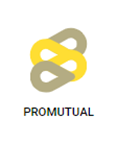




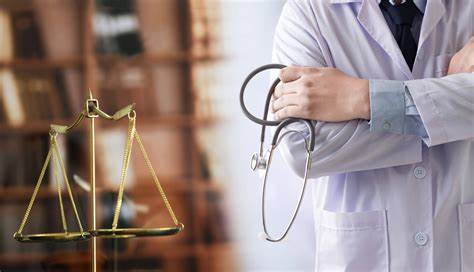

Lo primero que se procede a hacer, es extraer el triángulo de la aseguradora para la cual queremos diseñar un modelo predictivo(aseguradora 683)  para la construcción de la reserva.

In [1]:
install.packages("readr")
library(readr)
help(read_delim)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
negligenciamed <- read_delim("medmal_pos.csv",delim=" ",col_names=TRUE)
str(negligenciamed )
negligenciamed

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Rows: 3400 Columns: 1
── Column specification ────────────────────────────────────────────────────────
Delimiter: " "
chr (1): GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


spc_tbl_ [3,400 × 1] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2: chr [1:3400] "669,Scpie Indemnity Co,1988,1988,1,121905,2716,97966,129104,-6214,135318,0,344558" "669,Scpie Indemnity Co,1988,1989,2,112211,24576,64117,129104,-6214,135318,0,344558" "669,Scpie Indemnity Co,1988,1990,3,103226,43990,39008,129104,-6214,135318,0,344558" "669,Scpie Indemnity Co,1988,1991,4,99599,59722,20736,129104,-6214,135318,0,344558" ...
 - attr(*, "spec")=
  .. cols(
  ..   `GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2` = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


"GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2"
<chr>
"669,Scpie Indemnity Co,1988,1988,1,121905,2716,97966,129104,-6214,135318,0,344558"
"669,Scpie Indemnity Co,1988,1989,2,112211,24576,64117,129104,-6214,135318,0,344558"
"669,Scpie Indemnity Co,1988,1990,3,103226,43990,39008,129104,-6214,135318,0,344558"
"669,Scpie Indemnity Co,1988,1991,4,99599,59722,20736,129104,-6214,135318,0,344558"
"669,Scpie Indemnity Co,1988,1992,5,96006,71019,13599,129104,-6214,135318,0,344558"
"669,Scpie Indemnity Co,1988,1993,6,90487,76354,10577,129104,-6214,135318,0,344558"
"669,Scpie Indemnity Co,1988,1994,7,82640,76792,3762,129104,-6214,135318,0,344558"
"669,Scpie Indemnity Co,1988,1995,8,80406,77207,2105,129104,-6214,135318,0,344558"
"669,Scpie Indemnity Co,1988,1996,9,78920,77588,819,129104,-6214,135318,0,344558"


Información de las columnas.


In [3]:
#columnas
str(negligenciamed)

spc_tbl_ [3,400 × 1] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2: chr [1:3400] "669,Scpie Indemnity Co,1988,1988,1,121905,2716,97966,129104,-6214,135318,0,344558" "669,Scpie Indemnity Co,1988,1989,2,112211,24576,64117,129104,-6214,135318,0,344558" "669,Scpie Indemnity Co,1988,1990,3,103226,43990,39008,129104,-6214,135318,0,344558" "669,Scpie Indemnity Co,1988,1991,4,99599,59722,20736,129104,-6214,135318,0,344558" ...
 - attr(*, "spec")=
  .. cols(
  ..   `GRCODE,GRNAME,AccidentYear,DevelopmentYear,DevelopmentLag,IncurLoss_F2,CumPaidLoss_F2,BulkLoss_F2,EarnedPremDIR_F2,EarnedPremCeded_F2,EarnedPremNet_F2,Single,PostedReserve97_F2` = col_character()
  .. )
 - attr(*, "problems")=<externalptr> 


Para saber el número de filas y columnas


In [4]:
dim(negligenciamed)

[1] 3400    1

Se modifica el nombre de las columnas


In [5]:

negligenciamed.v1 <- read.csv("medmal_pos.csv",sep = ",",
                         col.names=c("Numero_aseguradora","Nombre_compañia","Año_Accidente","Año_desarrollo","AccidentYear",
                                     "Incurridos_año","Reclamaciones_Pagadas ","BulkLoss_F2"," EarnedPremDIR_F2",
                                     "  EarnedPremCeded_F2","EarnedPremNet_F2 "," Single ","PostedReserve97_F2"))

str(negligenciamed.v1)

'data.frame':	3400 obs. of  13 variables:
 $ Numero_aseguradora    : int  669 669 669 669 669 669 669 669 669 669 ...
 $ Nombre_compañia       : chr  "Scpie Indemnity Co" "Scpie Indemnity Co" "Scpie Indemnity Co" "Scpie Indemnity Co" ...
 $ Año_Accidente         : int  1988 1988 1988 1988 1988 1988 1988 1988 1988 1988 ...
 $ Año_desarrollo        : int  1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 ...
 $ AccidentYear          : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Incurridos_año        : int  121905 112211 103226 99599 96006 90487 82640 80406 78920 78511 ...
 $ Reclamaciones_Pagadas.: int  2716 24576 43990 59722 71019 76354 76792 77207 77588 77656 ...
 $ BulkLoss_F2           : int  97966 64117 39008 20736 13599 10577 3762 2105 819 407 ...
 $ X.EarnedPremDIR_F2    : int  129104 129104 129104 129104 129104 129104 129104 129104 129104 129104 ...
 $ X..EarnedPremCeded_F2 : int  -6214 -6214 -6214 -6214 -6214 -6214 -6214 -6214 -6214 -6214 ...
 $ EarnedPremNet_F2.     : int  135318 135318 1

Resumen de las columnas


In [6]:
summary(negligenciamed.v1 )


 Numero_aseguradora Nombre_compañia    Año_Accidente  Año_desarrollo
 Min.   :  669      Length:3400        Min.   :1988   Min.   :1988  
 1st Qu.:10341      Class :character   1st Qu.:1990   1st Qu.:1994  
 Median :19764      Mode  :character   Median :1992   Median :1997  
 Mean   :22810                         Mean   :1992   Mean   :1997  
 3rd Qu.:36234                         3rd Qu.:1995   3rd Qu.:2000  
 Max.   :44504                         Max.   :1997   Max.   :2006  
  AccidentYear  Incurridos_año   Reclamaciones_Pagadas.  BulkLoss_F2      
 Min.   : 1.0   Min.   :   -17   Min.   : -1190         Min.   :-32101.0  
 1st Qu.: 3.0   1st Qu.:     0   1st Qu.:     0         1st Qu.:     0.0  
 Median : 5.5   Median :   645   Median :   187         Median :     0.0  
 Mean   : 5.5   Mean   : 11609   Mean   :  6706         Mean   :  1095.8  
 3rd Qu.: 8.0   3rd Qu.:  9050   3rd Qu.:  4386         3rd Qu.:   107.2  
 Max.   :10.0   Max.   :179425   Max.   :113189         Max.   :104



```
# Tiene formato de código
```

Rastrear NA, no se encontraron valores nulo.


In [7]:
is.na(negligenciamed.v1)

Numero_aseguradora,Nombre_compañia,Año_Accidente,Año_desarrollo,AccidentYear,Incurridos_año,Reclamaciones_Pagadas.,BulkLoss_F2,X.EarnedPremDIR_F2,X..EarnedPremCeded_F2,EarnedPremNet_F2.,X.Single.,PostedReserve97_F2
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


como me interesa construir el triangulo de incurridos, dejo las columnas de interés.

In [8]:
negligenciamed.v2 <- negligenciamed.v1[, c("Numero_aseguradora", "Año_Accidente", "Año_desarrollo", "Incurridos_año")]

In [9]:
negligenciamed.v2$Numero_aseguradora <- as.numeric(negligenciamed.v2$Numero_aseguradora)
negligenciamed.v2$Año_Accidente <- as.numeric(negligenciamed.v2$Año_Accidente)
negligenciamed.v2$Año_desarrollo <- as.numeric(negligenciamed.v2$Año_desarrollo)
negligenciamed.v2$Incurridos_año <- as.numeric(negligenciamed.v2$Incurridos_año)

se genera un vector con los códigos de las 34 aseguradoras

In [10]:
aseguradoras <- unique( negligenciamed.v1$Numero_aseguradora)

aseguradoras[2]


[1] 683

Sin embargo para términos del trataminedto que se hará más adetante con la base de datos, es importante generar los triándulos superiores e inferiores de todas las aseguradoras.

In [11]:
install.packages('ChainLadder')
library(ChainLadder)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘zoo’, ‘Rcpp’, ‘plyr’, ‘expint’, ‘car’, ‘lmtest’, ‘sandwich’, ‘coda’, ‘biglm’, ‘minqa’, ‘reshape2’, ‘actuar’, ‘tweedie’, ‘systemfit’, ‘statmod’, ‘cplm’



Welcome to ChainLadder version 0.2.18


To cite package ‘ChainLadder’ in publications use:

  Gesmann M, Murphy D, Zhang Y, Carrato A, Wuthrich M, Concina F, Dal
  Moro E (2023). _ChainLadder: Statistical Methods and Models for
  Claims Reserving in General Insurance_. R package version 0.2.18,
  <https://CRAN.R-project.org/package=ChainLadder>.

To suppress this message use:
suppressPackageStartupMessages(library(ChainLadder))




In [12]:
resultados_arriba <- vector("list", length(aseguradoras))

In [13]:
resultados_arriba <- vector("list", length(aseguradoras))
contador <- 1
for (i in aseguradoras) {
 Base_Aseguradoras <- negligenciamed.v2[negligenciamed.v2$Numero_aseguradora == i, ]
 recopilado_base  <-  Base_Aseguradoras[, c("Año_Accidente", "Año_desarrollo", "Incurridos_año")]
 Base_Aseguradoras$Incurridos_año <- ifelse( recopilado_base$Año_desarrollo>=1998, "NA",  recopilado_base$Incurridos_año )
 Base_Aseguradoras_2 <- within(Base_Aseguradoras,{
              periodo_desarrollo <- Año_desarrollo  - Año_Accidente })

Base_Aseguradoras_2 <- Base_Aseguradoras_2[, c("Año_Accidente", "periodo_desarrollo", "Incurridos_año")]
Base_Aseguradoras_2 $Incurridos_año <- as.numeric(Base_Aseguradoras_2 $Incurridos_año)
Base_Aseguradoras_2 $periodo_desarrollo<- as.numeric(Base_Aseguradoras_2 $periodo_desarrollo)
Base_Aseguradoras_2 $Año_Accidente <- as.numeric(Base_Aseguradoras_2 $Año_Accidente)

Base_Aseguradoras_2.tri <- as.triangle(Base_Aseguradoras_2,
                          origin="Año_Accidente",
                          dev="periodo_desarrollo",
                          value="Incurridos_año")


resultados_arriba[[contador]] <- Base_Aseguradoras_2.tri
contador <- contador + 1
}






Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(e

In [14]:
resultados_abajo <- vector("list", length(aseguradoras))
contador <- 1
for (i in aseguradoras) {
 Base_Aseguradoras_SUB <- negligenciamed.v2[negligenciamed.v2$Numero_aseguradora == i, ]
 recopilado_base_SUB  <-  Base_Aseguradoras_SUB[, c("Año_Accidente", "Año_desarrollo", "Incurridos_año")]
 Base_Aseguradoras_SUB$Incurridos_año <- ifelse(Base_Aseguradoras_SUB$Año_desarrollo < 1998, "NA", Base_Aseguradoras_SUB$Incurridos_año )

 Base_Aseguradoras_2_SUB <- within(Base_Aseguradoras_SUB,{
              periodo_desarrollo <- Año_desarrollo  - Año_Accidente })

Base_Aseguradoras_2_SUB  <- Base_Aseguradoras_2_SUB[, c("Año_Accidente", "periodo_desarrollo", "Incurridos_año")]
Base_Aseguradoras_2_SUB$Incurridos_año <- as.numeric(Base_Aseguradoras_2_SUB$Incurridos_año)
Base_Aseguradoras_2_SUB$periodo_desarrollo<- as.numeric(Base_Aseguradoras_2_SUB$periodo_desarrollo)
Base_Aseguradoras_2_SUB$Año_Accidente <- as.numeric(Base_Aseguradoras_2_SUB$Año_Accidente)

Base_Aseguradoras_2_SUB.tri <- as.triangle(Base_Aseguradoras_2_SUB,
                          origin="Año_Accidente",
                          dev="periodo_desarrollo",
                          value="Incurridos_año")


resultados_abajo[[contador]] <- Base_Aseguradoras_2_SUB.tri
contador <- contador + 1


}

 resultados_abajo[[2]]

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”
Warning message in eval(e

,0,1,2,3,4,5,6,7,8,9
1988,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989,NA,NA,NA,NA,NA,NA,NA,NA,NA,27703
1990,NA,NA,NA,NA,NA,NA,NA,NA,21804,20984
1991,NA,NA,NA,NA,NA,NA,NA,30627,30151,30413
1992,NA,NA,NA,NA,NA,NA,27067,26018,25603,25666
1993,NA,NA,NA,NA,NA,35936,37005,38270,38382,37760
1994,NA,NA,NA,NA,35062,36552,36388,36294,36371,36409
1995,NA,NA,NA,30941,28954,29424,28768,28557,29521,29500
1996,NA,NA,27963,25959,29673,31900,33123,31773,33051,32644
1997,NA,29536,26174,24997,26237,28330,30665,29690,29928,29676


In [15]:
class( resultados_abajo[[2]])

[1] "triangle" "matrix"

In [16]:
IBNR  <- sum(resultados_abajo[[2]])
IBNR

[1] NA

Nuestra aseguradora de interés es Promutual de código 638 (2), por lo cual es importante apartar la información de de esta aseguradora para obtener el triángulo superior.

In [17]:
Promutual <- negligenciamed.v2[negligenciamed.v2$Numero_aseguradora == 683, ]


In [18]:
Promutual1  <- Promutual [, c("Año_Accidente", "Año_desarrollo", "Incurridos_año")]
Promutual1

,Año_Accidente,Año_desarrollo,Incurridos_año
,<dbl>,<dbl>,<dbl>
101,1988,1988,43393
102,1988,1989,39560
103,1988,1990,50398
104,1988,1991,46630
105,1988,1992,44007
106,1988,1993,30000
107,1988,1994,27171
108,1988,1995,27395
109,1988,1996,27034


Para obtener sólo la información del histórico y eliminar la que es la de predicción ( la que se usará pata teatear los resultados finales) se hace el siguiente proceso

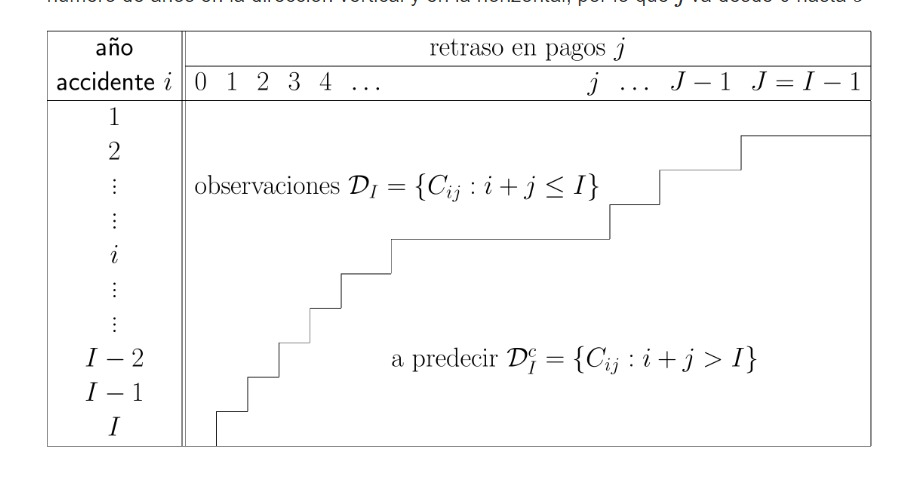

Vector construido para calcular el incurrido.

In [19]:
Promutual4  <- Promutual [, c("Año_Accidente", "Año_desarrollo", "Incurridos_año")]
Promutual4

,Año_Accidente,Año_desarrollo,Incurridos_año
,<dbl>,<dbl>,<dbl>
101,1988,1988,43393
102,1988,1989,39560
103,1988,1990,50398
104,1988,1991,46630
105,1988,1992,44007
106,1988,1993,30000
107,1988,1994,27171
108,1988,1995,27395
109,1988,1996,27034


In [20]:
Promutual4$Incurridos_año <- ifelse(Promutual4$Año_desarrollo < 1998, "0", Promutual4$Incurridos_año )
Promutual4$Incurridos_año <- as.numeric(Promutual4$Incurridos_año)

In [21]:
IBNR_TOTAL_DETERMINISTICO <-  sum(Promutual4$Incurridos_año)
IBNR_TOTAL_DETERMINISTICO

[1] 1377449

In [22]:
Promutual1$Incurridos_año <- ifelse(Promutual1 $Año_desarrollo>=1998, "NA", Promutual1 $Incurridos_año )

In [23]:
Promutual1

,Año_Accidente,Año_desarrollo,Incurridos_año
,<dbl>,<dbl>,<chr>
101,1988,1988,43393
102,1988,1989,39560
103,1988,1990,50398
104,1988,1991,46630
105,1988,1992,44007
106,1988,1993,30000
107,1988,1994,27171
108,1988,1995,27395
109,1988,1996,27034


In [24]:
Promutua3 <- within(Promutual1,{
              periodo_desarrollo <- Año_desarrollo  - Año_Accidente })
 Promutua3

,Año_Accidente,Año_desarrollo,Incurridos_año,periodo_desarrollo
,<dbl>,<dbl>,<chr>,<dbl>
101,1988,1988,43393,0
102,1988,1989,39560,1
103,1988,1990,50398,2
104,1988,1991,46630,3
105,1988,1992,44007,4
106,1988,1993,30000,5
107,1988,1994,27171,6
108,1988,1995,27395,7
109,1988,1996,27034,8


In [25]:
Promutual2 <- within(Promutual,{
              periodo_desarrollo <- Año_desarrollo  - Año_Accidente })


In [26]:
Promutual2

,Numero_aseguradora,Año_Accidente,Año_desarrollo,Incurridos_año,periodo_desarrollo
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
101,683,1988,1988,43393,0
102,683,1988,1989,39560,1
103,683,1988,1990,50398,2
104,683,1988,1991,46630,3
105,683,1988,1992,44007,4
106,683,1988,1993,30000,5
107,683,1988,1994,27171,6
108,683,1988,1995,27395,7
109,683,1988,1996,27034,8


cambio el formato de los caracteres de la tabla

In [27]:
Promutual3  <- Promutual2 [, c("Año_Accidente", "periodo_desarrollo", "Incurridos_año")]
Promutual3$Incurridos_año <- as.numeric(Promutual3$Incurridos_año)
Promutual3$periodo_desarrollo<- as.numeric(Promutual3$periodo_desarrollo)
Promutual3$Año_Accidente <- as.numeric(Promutual3$Año_Accidente)

In [28]:
Promutual3

,Año_Accidente,periodo_desarrollo,Incurridos_año
,<dbl>,<dbl>,<dbl>
101,1988,0,43393
102,1988,1,39560
103,1988,2,50398
104,1988,3,46630
105,1988,4,44007
106,1988,5,30000
107,1988,6,27171
108,1988,7,27395
109,1988,8,27034


In [29]:
Promutual4 <- Promutual3 [, c("Año_Accidente", "periodo_desarrollo", "Incurridos_año")]
Promutual4

,Año_Accidente,periodo_desarrollo,Incurridos_año
,<dbl>,<dbl>,<dbl>
101,1988,0,43393
102,1988,1,39560
103,1988,2,50398
104,1988,3,46630
105,1988,4,44007
106,1988,5,30000
107,1988,6,27171
108,1988,7,27395
109,1988,8,27034


Crear un triangulo de run-off de incurridos

In [30]:
install.packages("tidyr")
library(tidyr)
library(dplyr)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [31]:
triangulo <- spread(Promutual3 , key = periodo_desarrollo   , value =Incurridos_año )
triangulo

Año_Accidente,0,1,2,3,4,5,6,7,8,9
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1988,43393,39560,50398,46630,44007,30000,27171,27395,27034,26804
1989,23460,54478,50633,46938,34432,30406,30408,29794,28014,27703
1990,44843,40405,38517,29661,23559,23269,22813,22594,21804,20984
1991,40715,44679,35510,33872,32713,30871,28734,30627,30151,30413
1992,55743,44309,33884,29723,30954,27665,27067,26018,25603,25666
1993,49446,30760,27841,37179,35687,35936,37005,38270,38382,37760
1994,33465,32438,38458,37845,35062,36552,36388,36294,36371,36409
1995,32837,32449,34650,30941,28954,29424,28768,28557,29521,29500
1996,34711,31935,27963,25959,29673,31900,33123,31773,33051,32644


# Estadísticas de prueba.


> A partir de la información de las 33 aseguradoras restantes se procede a analizar el comportamiento de todas ellas y obtener información que sirva para contruir la reserva de la nuestra aseguradora.



In [32]:
negligenciamed.v2


Numero_aseguradora,Año_Accidente,Año_desarrollo,Incurridos_año
<dbl>,<dbl>,<dbl>,<dbl>
669,1988,1988,121905
669,1988,1989,112211
669,1988,1990,103226
669,1988,1991,99599
669,1988,1992,96006
669,1988,1993,90487
669,1988,1994,82640
669,1988,1995,80406
669,1988,1996,78920


Quito de la base a mi aseguradora, pues de ella no tengo el desarrollo completo del triángulo ( es precisamente lo que quiero encontrar)


In [33]:
filtrados_negligencia <- subset(negligenciamed.v2, Numero_aseguradora != 683)
filtrados_negligencia

,Numero_aseguradora,Año_Accidente,Año_desarrollo,Incurridos_año
,<dbl>,<dbl>,<dbl>,<dbl>
1,669,1988,1988,121905
2,669,1988,1989,112211
3,669,1988,1990,103226
4,669,1988,1991,99599
5,669,1988,1992,96006
6,669,1988,1993,90487
7,669,1988,1994,82640
8,669,1988,1995,80406
9,669,1988,1996,78920


voy a crear 10 df uno por cada año


In [34]:
filtrados_negligencia1 <- within(filtrados_negligencia ,{
              periodo_desarrollo <- Año_desarrollo   - Año_Accidente })
filtrados_negligencia2 <- filtrados_negligencia1 [, c("Numero_aseguradora","Año_Accidente", "periodo_desarrollo", "Incurridos_año")]

In [35]:
lista_de_dataframes <- split(filtrados_negligencia2, filtrados_negligencia1$`Año_Accidente`)

In [36]:
negligencia_1988 <- lista_de_dataframes[[1]]
negligencia_1989 <- lista_de_dataframes[[2]]
negligencia_1990 <- lista_de_dataframes[[3]]
negligencia_1991 <- lista_de_dataframes[[4]]
negligencia_1992 <- lista_de_dataframes[[5]]
negligencia_1993 <- lista_de_dataframes[[6]]
negligencia_1994 <- lista_de_dataframes[[7]]
negligencia_1995 <- lista_de_dataframes[[8]]
negligencia_1996 <- lista_de_dataframes[[9]]
negligencia_1997 <- lista_de_dataframes[[10]]

In [37]:
negligencia_1988

,Numero_aseguradora,Año_Accidente,periodo_desarrollo,Incurridos_año
,<dbl>,<dbl>,<dbl>,<dbl>
1,669,1988,0,121905
2,669,1988,1,112211
3,669,1988,2,103226
4,669,1988,3,99599
5,669,1988,4,96006
6,669,1988,5,90487
7,669,1988,6,82640
8,669,1988,7,80406
9,669,1988,8,78920


Ahora genero 10 gráficas (una por cada año) que me muestre cómo se desarrollan los siniestros en cada periodo y para cada aseguradora.



In [38]:
install.packages("ggplot2")
library(ggplot2)
help(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



personalizar template

In [39]:
mitema <-
theme(
  plot.title=element_text(family="sans",face="bold",size=20,vjust=0.5,hjust=0.5,color="black",angle=0),
  axis.title.x=element_text(family="sans",face="bold",size=18,vjust=0.5,hjust=0.5,color="blue",angle=0),
  axis.title.y=element_text(family="sans",face="bold",size=18,vjust=0.5,hjust=0.5,color="blue",angle=90),
  axis.text.x=element_text(family="mono",face="bold",size=14,vjust=0.5,hjust=0.5,color="black",angle=0),
  axis.text.y=element_text(family="mono",face="bold",size=14,vjust=0.5,hjust=0.5,color="black",angle=0),
  panel.background=element_rect(fill="gray92"),
  panel.grid.major=element_line(color="white",size=1),
  panel.grid.minor=element_line(color="white",size=0.5)
     )

Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


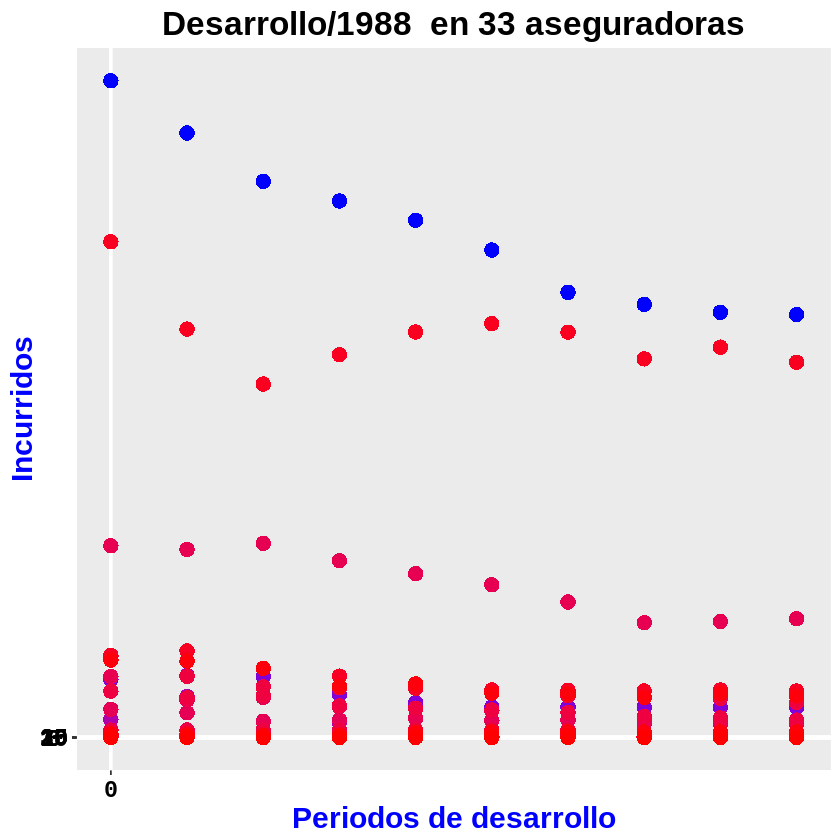

In [40]:
ggplot(negligencia_1988 ,aes(x= periodo_desarrollo,y=Incurridos_año,color= Numero_aseguradora, shape= Numero_aseguradora)) +
       geom_point(size=4,shape=16) +
       scale_x_continuous(breaks=seq(from=0,to=300,by=50)) +
       scale_y_continuous(breaks=seq(from=0,to=30,by=5)) +
       labs(title="Desarrollo/1988  en 33 aseguradoras",x="Periodos de desarrollo",
            y="Incurridos",color="Aseguradoras", shape="Aseguradoras") +
       scale_color_gradient(low="blue",high="red",breaks=seq(0,50,10)) + mitema

Se realiza un diagrama de cajas (boxplot)para identificar datos atípicos u outlier

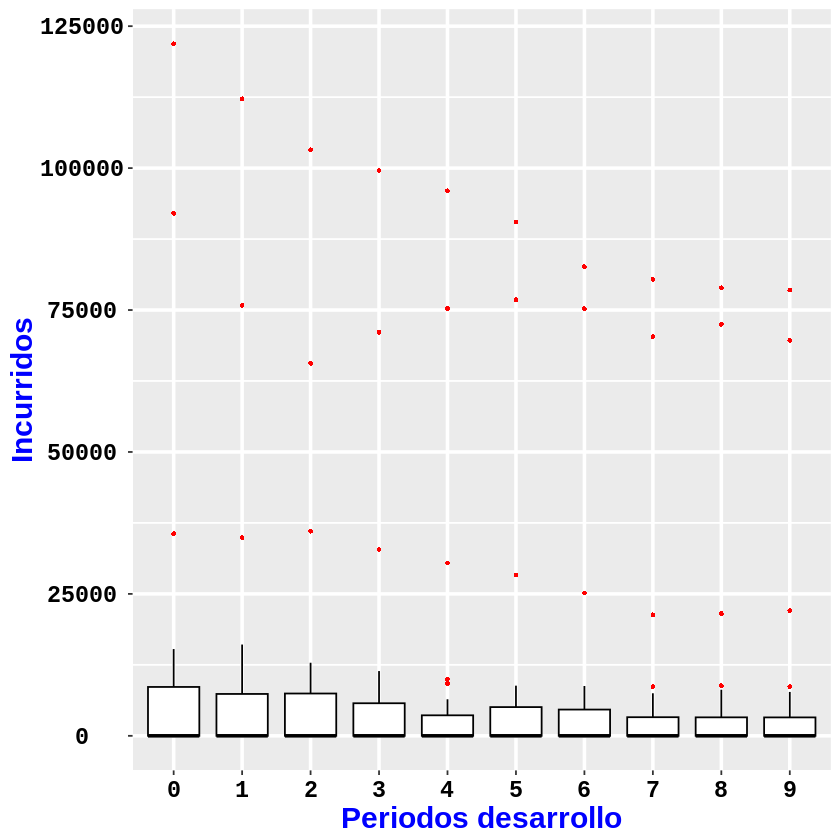

In [41]:
negligencia_1988_G <-ggplot(negligencia_1988,aes(x=factor(periodo_desarrollo),y=Incurridos_año)) +
       geom_boxplot(outlier.shape=16,outlier.color="red",outlier.size=1,color="black",linetype="solid") +
       labs(x="Periodos desarrollo", y="Incurridos") +
       scale_fill_manual(values=c("salmon2","green2")) + mitema +
       theme(legend.position="right",
             legend.text=element_text(size=14,hjust=0),
             legend.title=element_text(face="bold",size=15)
            )

         negligencia_1988_G

Para identificar los Outlier, buscamos los valores de los bigotes inferior y superior


In [42]:
Q1 <- quantile(negligencia_1988$Incurridos_año, 0.25)
Q3 <- quantile(negligencia_1988$Incurridos_año, 0.75)
IQR <- Q3 - Q1
bigote_inferior <- Q1 - 1.5 * IQR
bigote_superior <- Q3 + 1.5 * IQR
outliers <- negligencia_1988$Incurridos_año[negligencia_1988$Incurridos_año < bigote_inferior | negligencia_1988$Incurridos_año > bigote_superior]
print(outliers)



 [1] 121905 112211 103226  99599  96006  90487  82640  80406  78920  78511
[11]  35603  34914  36042  32840  30437  28357  25166  21319  21541  22054
[21]  15127  15278  16075  12876  92023  75813  65611  71076  75285  76818
[31]  75240  70297  72458  69670  14401  14191  12843


Las filas 1, 11, 21 y 31 corresponden a las aseguradoras 669, 33049,36676 y 41467, esto quiere decir que estas 4 aseguradoras tienen un comportamienti inusual  al compararlas con las otras 29.

Gráfica para las 33 aseguradoras cuyos siniestros sucedieron en 1989

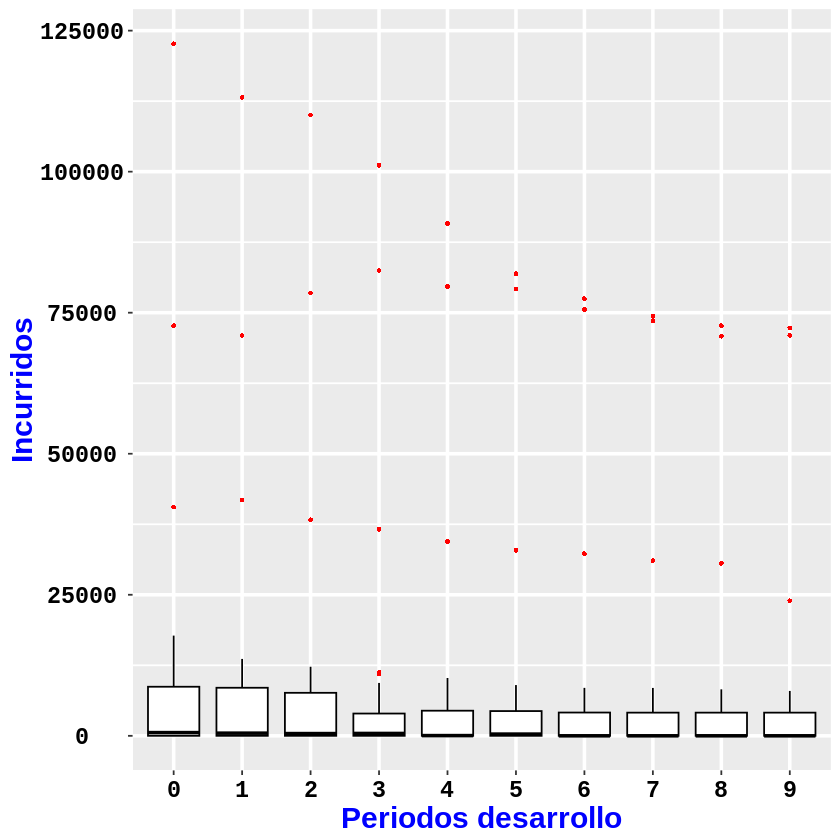

In [43]:
negligencia_1989_G <-ggplot(negligencia_1989,aes(x=factor(periodo_desarrollo),y=Incurridos_año)) +
       geom_boxplot(outlier.shape=16,outlier.color="red",outlier.size=1,color="black",linetype="solid") +
       labs(x="Periodos desarrollo", y="Incurridos") +
       scale_fill_manual(values=c("salmon2","green2")) + mitema +
       theme(legend.position="right",
             legend.text=element_text(size=14,hjust=0),
             legend.title=element_text(face="bold",size=15)
            )

         negligencia_1989_G

In [44]:
Q1 <- quantile(negligencia_1989$Incurridos_año, 0.25)
Q3 <- quantile(negligencia_1989$Incurridos_año, 0.75)
IQR <- Q3 - Q1
bigote_inferior <- Q1 - 1.5 * IQR
bigote_superior <- Q3 + 1.5 * IQR
outliers <- negligencia_1989$Incurridos_año[negligencia_1989$Incurridos_año < bigote_inferior | negligencia_1989$Incurridos_año > bigote_superior]
print(outliers)

 [1] 122679 113165 110037 101142  90817  81919  77491  73577  72716  72317
[11]  40544  41783  38297  36610  34451  32887  32285  31061  30562  23930
[21]  15485  15559  12250  12250  17760  13627  11633  72697  70954  78505
[31]  82485  79646  79184  75555  74415  70827  70992  13744  12906


Se obtienen los mismos Outlier

Para 1990 pasa exactamente lo mismo

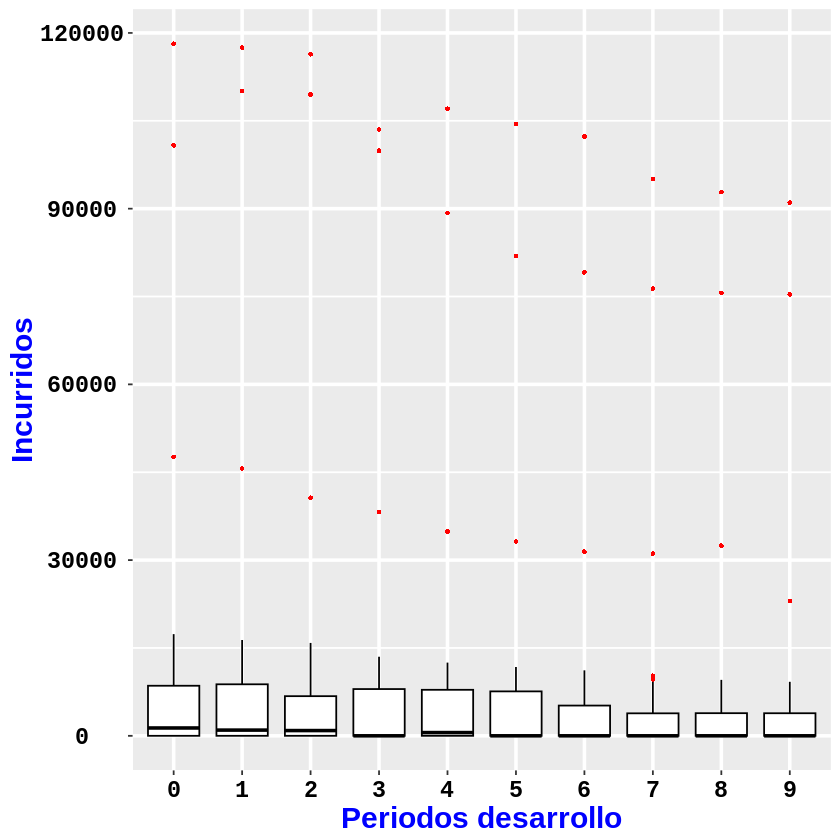

In [45]:
negligencia_1990_G <-ggplot(negligencia_1990,aes(x=factor(periodo_desarrollo),y=Incurridos_año)) +
       geom_boxplot(outlier.shape=16,outlier.color="red",outlier.size=1,color="black",linetype="solid") +
       labs(x="Periodos desarrollo", y="Incurridos") +
       scale_fill_manual(values=c("salmon2","green2")) + mitema +
       theme(legend.position="right",
             legend.text=element_text(size=14,hjust=0),
             legend.title=element_text(face="bold",size=15)
            )

         negligencia_1990_G

In [46]:
Q1 <- quantile(negligencia_1990$Incurridos_año, 0.25)
Q3 <- quantile(negligencia_1990$Incurridos_año, 0.75)
IQR <- Q3 - Q1
bigote_inferior <- Q1 - 1.5 * IQR
bigote_superior <- Q3 + 1.5 * IQR
outliers <- negligencia_1990$Incurridos_año[negligencia_1990$Incurridos_año < bigote_inferior | negligencia_1990$Incurridos_año > bigote_superior]
print(outliers)

 [1] 118157 117497 116377  99895  89252  81916  79134  76333  75612  75350
[11]  47606  45624  40653  38200  34890  33160  31439  31114  32465  23019
[21]  16601  17361 100815 110078 109500 103517 107063 104460 102331  95092
[31]  92819  91011


In [47]:
Q1 <- quantile(negligencia_1991$Incurridos_año, 0.25)
Q3 <- quantile(negligencia_1991$Incurridos_año, 0.75)
IQR <- Q3 - Q1
bigote_inferior <- Q1 - 1.5 * IQR
bigote_superior <- Q3 + 1.5 * IQR
outliers <- negligencia_1991$Incurridos_año[negligencia_1991$Incurridos_año < bigote_inferior | negligencia_1991$Incurridos_año > bigote_superior]
print(outliers)

 [1] 117981 122443 121056 113795 102830  98071  94870  91062  90493  90345
[11]  48218  46885  42076  39089  39191  35291  34436  32993  30014  31945
[21]  17125 132076 132834 127488 122437 120180 111991 107540 102652 103128
[31] 103923  18942


In [48]:
Q1 <- quantile(negligencia_1992$Incurridos_año, 0.25)
Q3 <- quantile(negligencia_1992$Incurridos_año, 0.75)
IQR <- Q3 - Q1
bigote_inferior <- Q1 - 1.5 * IQR
bigote_superior <- Q3 + 1.5 * IQR
outliers <- negligencia_1992$Incurridos_año[negligencia_1992$Incurridos_año < bigote_inferior | negligencia_1992$Incurridos_año > bigote_superior]
print(outliers)

 [1] 131059 130155 124195 113974 106817  99182  92588  91000  89256  89251
[11]  49531  49106  44753  42074  40891  38488  37337  32330  32408  31106
[21]  20841  23496 157313 156050 131784 133916 126903 112677 108913 108183
[31] 105176 100621  20949


In [49]:
Q1 <- quantile(negligencia_1993$Incurridos_año, 0.25)
Q3 <- quantile(negligencia_1993$Incurridos_año, 0.75)
IQR <- Q3 - Q1
bigote_inferior <- Q1 - 1.5 * IQR
bigote_superior <- Q3 + 1.5 * IQR
outliers <- negligencia_1993$Incurridos_año[negligencia_1993$Incurridos_año < bigote_inferior | negligencia_1993$Incurridos_año > bigote_superior]
print(outliers)

 [1] 134700 130757 125253 114717 111294  98014  96872  95714  96017  96047
[11]  19436  51381  53018  50759  48593  48893  46686  45327  42960  41864
[21]  41193  19563 156497 142070 137182 124198 118130 115760 113967 112533
[31] 109211 103859  21684  20708


In [50]:
Q1 <- quantile(negligencia_1994$Incurridos_año, 0.25)
Q3 <- quantile(negligencia_1994$Incurridos_año, 0.75)
IQR <- Q3 - Q1
bigote_inferior <- Q1 - 1.5 * IQR
bigote_superior <- Q3 + 1.5 * IQR
outliers <- negligencia_1994$Incurridos_año[negligencia_1994$Incurridos_año < bigote_inferior | negligencia_1994$Incurridos_año > bigote_superior]
print(outliers)

 [1] 136749 128192 121355 111877  96152  91502  90498  91870  91848  91938
[11]  55416  54542  56189  54875  52824  50691  46442  43945  42648  41269
[21]  21027 179333 173125 168276 146412 126431 125622 121483 118083 110066
[31] 109803


In [51]:
Q1 <- quantile(negligencia_1995$Incurridos_año, 0.25)
Q3 <- quantile(negligencia_1995$Incurridos_año, 0.75)
IQR <- Q3 - Q1
bigote_inferior <- Q1 - 1.5 * IQR
bigote_superior <- Q3 + 1.5 * IQR
outliers <- negligencia_1995$Incurridos_año[negligencia_1995$Incurridos_año < bigote_inferior | negligencia_1995$Incurridos_año > bigote_superior]
print(outliers)

 [1] 140962 132405 118332 100050  88809  82360  81986  81887  81796  81782
[11]  30094  30285  29621  29322  28321  27427  27427  27385  27396  55670
[21]  58324  59433  57472  57666  54514  48097  49516  54476  53944  25522
[31] 179425 177915 162020 152726 146354 141952 127640 118178 117391 116625


In [52]:
Q1 <- quantile(negligencia_1996$Incurridos_año, 0.25)
Q3 <- quantile(negligencia_1996$Incurridos_año, 0.75)
IQR <- Q3 - Q1
bigote_inferior <- Q1 - 1.5 * IQR
bigote_superior <- Q3 + 1.5 * IQR
outliers <- negligencia_1996$Incurridos_año[negligencia_1990$Incurridos_año < bigote_inferior | negligencia_1996$Incurridos_año > bigote_superior]
print(outliers)

 [1] 134473 128980 113645 104273  99276  97782  97282  97738  97601  97251
[11]  33824  35579  35411  31652  29614  26928  27282  27197  27127  26820
[21]  60149  64947  65081  64719  60533  64307  61153  59990  58285  56071
[31]  25316  23899 163622 152542 136799 132456 124230 111000 106400 104641
[41]  99762  98694


In [53]:
Q1 <- quantile(negligencia_1997$Incurridos_año, 0.25)
Q3 <- quantile(negligencia_1997$Incurridos_año, 0.75)
IQR <- Q3 - Q1
bigote_inferior <- Q1 - 1.5 * IQR
bigote_superior <- Q3 + 1.5 * IQR
outliers <- negligencia_1997$Incurridos_año[negligencia_1997$Incurridos_año < bigote_inferior | negligencia_1997$Incurridos_año > bigote_superior]
print(outliers)

 [1] 137944 127727 114057 107001 102143  99665  99942  99968  99590  99378
[11]  64691  65783  66505  65783  68665  65948  66388  68734  69812  72948
[21] 130147 130802 131994 119734 112183 102826 103302  96291  98316 104676


Se observa que para los 10 años de accidentes hay cuatro aseguradoras que coinciden en tener comportamientos de outlier, la 669,33049, 36676 y 41467


Estas tres aseguradoras tienen un comportamiento diferente a las demás sin embargo no necesariamente hay que excluirlas del análisis  pues lo que se quiere son modelos que respondan bien a cualquier información nueva que llegue.

In [54]:
numeros_a_eliminar <- c(683,669, 33049,36676,41467)

In [55]:
numeros_a_eliminar <- c(683,669, 33049,36676,41467)
filtrados_negligencia4 <- subset(negligenciamed.v2, !(Numero_aseguradora %in% numeros_a_eliminar))
filtrados_negligencia4

,Numero_aseguradora,Año_Accidente,Año_desarrollo,Incurridos_año
,<dbl>,<dbl>,<dbl>,<dbl>
201,841,1988,1988,0
202,841,1988,1989,0
203,841,1988,1990,0
204,841,1988,1991,0
205,841,1988,1992,0
206,841,1988,1993,0
207,841,1988,1994,0
208,841,1988,1995,0
209,841,1988,1996,0


In [56]:
filtrados_negligencia5 <- within(filtrados_negligencia4 ,{
              periodo_desarrollo <- Año_desarrollo   - Año_Accidente })
filtrados_negligencia6 <- filtrados_negligencia5 [, c("Numero_aseguradora","Año_Accidente", "periodo_desarrollo", "Incurridos_año")]

In [57]:
lista_de_dataframes8 <- split(filtrados_negligencia6, filtrados_negligencia6$`Año_Accidente`)

In [58]:
filtrados_negligencia6

,Numero_aseguradora,Año_Accidente,periodo_desarrollo,Incurridos_año
,<dbl>,<dbl>,<dbl>,<dbl>
201,841,1988,0,0
202,841,1988,1,0
203,841,1988,2,0
204,841,1988,3,0
205,841,1988,4,0
206,841,1988,5,0
207,841,1988,6,0
208,841,1988,7,0
209,841,1988,8,0


In [59]:
negligencia1_1988 <- lista_de_dataframes8[[1]]
negligencia1_1989 <- lista_de_dataframes[[2]]
negligencia1_1990 <- lista_de_dataframes[[3]]
negligencia1_1991 <- lista_de_dataframes[[4]]
negligencia1_1992 <- lista_de_dataframes[[5]]
negligencia1_1993 <- lista_de_dataframes[[6]]
negligencia1_1994 <- lista_de_dataframes[[7]]
negligencia1_1995 <- lista_de_dataframes[[8]]
negligencia1_1996 <- lista_de_dataframes[[9]]
negligencia1_1997 <- lista_de_dataframes[[10]]

In [60]:
negligencia1_1988

,Numero_aseguradora,Año_Accidente,periodo_desarrollo,Incurridos_año
,<dbl>,<dbl>,<dbl>,<dbl>
201,841,1988,0,0
202,841,1988,1,0
203,841,1988,2,0
204,841,1988,3,0
205,841,1988,4,0
206,841,1988,5,0
207,841,1988,6,0
208,841,1988,7,0
209,841,1988,8,0


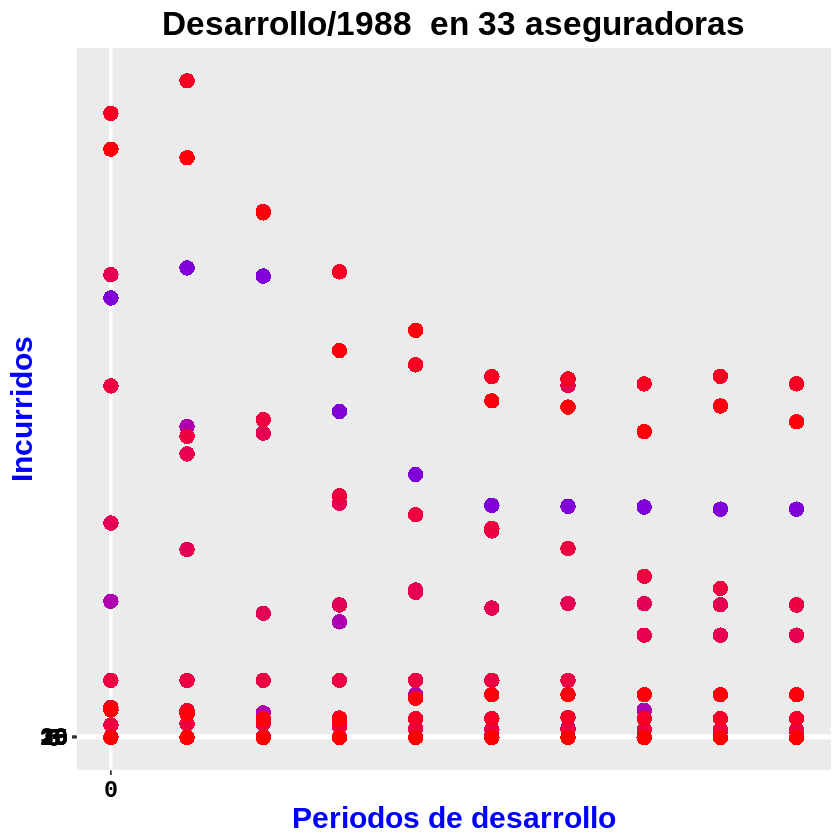

In [61]:
ggplot(negligencia1_1988 ,aes(x= periodo_desarrollo,y=Incurridos_año,color= Numero_aseguradora, shape= Numero_aseguradora)) +
       geom_point(size=4,shape=16) +
       scale_x_continuous(breaks=seq(from=0,to=300,by=50)) +
       scale_y_continuous(breaks=seq(from=0,to=30,by=5)) +
       labs(title="Desarrollo/1988  en 33 aseguradoras",x="Periodos de desarrollo",
            y="Incurridos",color="Aseguradoras", shape="Aseguradoras") +
       scale_color_gradient(low="blue",high="red",breaks=seq(0,50,10)) + mitema

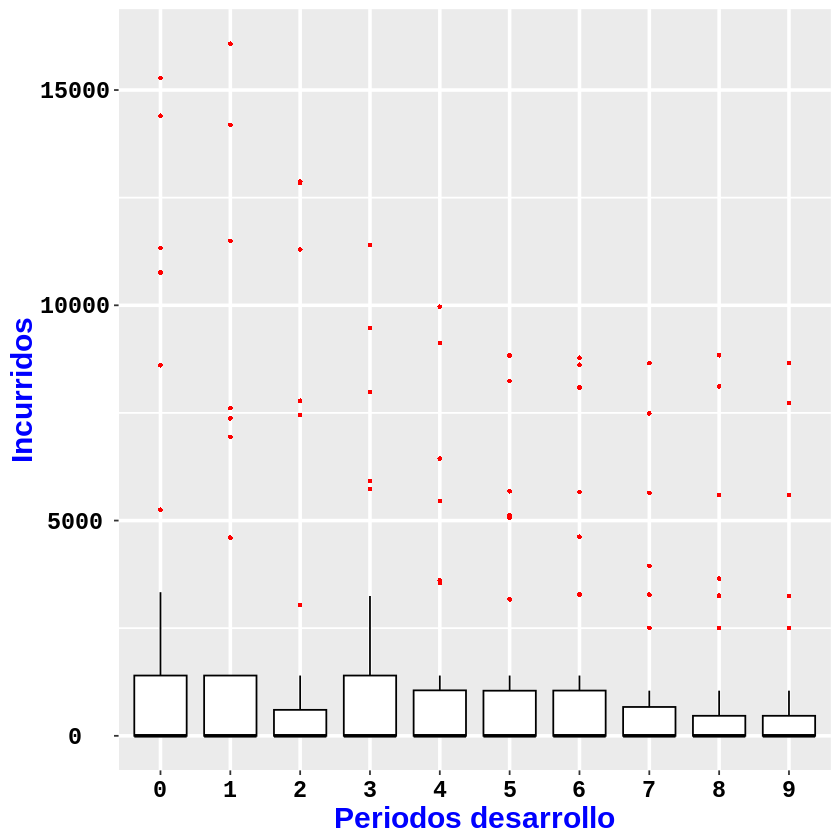

In [62]:
negligencia_1988_G <-ggplot(negligencia1_1988,aes(x=factor(periodo_desarrollo),y=Incurridos_año)) +
       geom_boxplot(outlier.shape=16,outlier.color="red",outlier.size=1,color="black",linetype="solid") +
       labs(x="Periodos desarrollo", y="Incurridos") +
       scale_fill_manual(values=c("salmon2","green2")) + mitema +
       theme(legend.position="right",
             legend.text=element_text(size=14,hjust=0),
             legend.title=element_text(face="bold",size=15)
            )

         negligencia_1988_G

In [63]:

negligencia1_1988

,Numero_aseguradora,Año_Accidente,periodo_desarrollo,Incurridos_año
,<dbl>,<dbl>,<dbl>,<dbl>
201,841,1988,0,0
202,841,1988,1,0
203,841,1988,2,0
204,841,1988,3,0
205,841,1988,4,0
206,841,1988,5,0
207,841,1988,6,0
208,841,1988,7,0
209,841,1988,8,0


** Tabla de Frecuencia**

In [64]:
filtrados_negligencia4

,Numero_aseguradora,Año_Accidente,Año_desarrollo,Incurridos_año
,<dbl>,<dbl>,<dbl>,<dbl>
201,841,1988,1988,0
202,841,1988,1989,0
203,841,1988,1990,0
204,841,1988,1991,0
205,841,1988,1992,0
206,841,1988,1993,0
207,841,1988,1994,0
208,841,1988,1995,0
209,841,1988,1996,0


In [65]:
install.packages("dplyr")
library(dplyr)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [66]:
table(filtrados_negligencia4$Año_Accidente)



1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 
 290  290  290  290  290  290  290  290  290  290 

In [67]:
table(filtrados_negligencia4$`Año_desarrollo`)


1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 
  29   58   87  116  145  174  203  232  261  290  261  232  203  174  145  116 
2004 2005 2006 
  87   58   29 

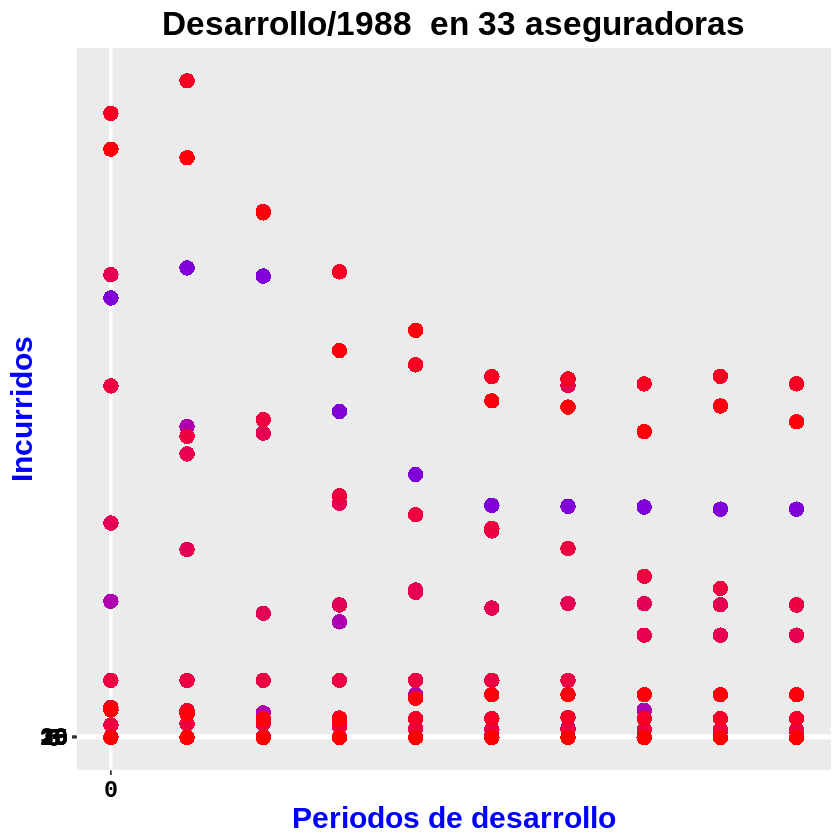

In [68]:
ggplot(negligencia1_1988 ,aes(x= periodo_desarrollo,y=Incurridos_año,color= Numero_aseguradora, shape= Numero_aseguradora)) +
       geom_point(size=4,shape=16) +
       scale_x_continuous(breaks=seq(from=0,to=300,by=50)) +
       scale_y_continuous(breaks=seq(from=0,to=30,by=5)) +
       labs(title="Desarrollo/1988  en 33 aseguradoras",x="Periodos de desarrollo",
            y="Incurridos",color="Aseguradoras", shape="Aseguradoras") +
       scale_color_gradient(low="blue",high="red",breaks=seq(0,50,10)) + mitema

In [69]:
install.packages("ggplot2")
library(ggplot2)
help(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
ggplot(negligencia1_1988,aes(x = periodo_desarrollo,y=Incurridos_año,color= Numero_aseguradora, shape= Numero_aseguradora)) +
       geom_point(color="red",shape=16,size=3.5) +
       geom_smooth(method="lm",formula=y ~ poly(x,degree=4),se=FALSE,size=1,linetype="solid",color="black") +
       labs(title="Ventas versus inversión en publicidad en TV",x="Publicidad en TV",y="Ventas") +
       scale_x_continuous(breaks=seq(from=0,to=300,by=50)) +
       scale_y_continuous(breaks=seq(from=0,to=30,by=5)) + mitema

In [ ]:
ggplot(negligencia1_1988,aes(x = periodo_desarrollo,y=Incurridos_año,color= Numero_aseguradora, shape= Numero_aseguradora))+
       geom_point(size=3.5) +
       labs(title="Ventas versus inversión en publicidad para TV",x="Publicidad para TV",
            y="Ventas",color="Publicidad\n en radio",shape="Publicidad\n en radio") +
       scale_x_discrete(breaks=seq(from=0,to=300,by=50)) +
       scale_y_discrete(breaks=seq(from=0,to=30,by=5)) +
       scale_color_manual(values=c("blue","black","red")) +
       scale_shape_manual(values=c(15,16,17)) + mitema


### **IBNR, Chain Ladder modelo determinista**


In [72]:
install.packages('ChainLadder')
library(ChainLadder)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [73]:
resultados_arriba[[2]]

,0,1,2,3,4,5,6,7,8,9
1988,43393,39560,50398,46630,44007,30000,27171,27395,27034,26804
1989,23460,54478,50633,46938,34432,30406,30408,29794,28014,NA
1990,44843,40405,38517,29661,23559,23269,22813,22594,NA,NA
1991,40715,44679,35510,33872,32713,30871,28734,NA,NA,NA
1992,55743,44309,33884,29723,30954,27665,NA,NA,NA,NA
1993,49446,30760,27841,37179,35687,NA,NA,NA,NA,NA
1994,33465,32438,38458,37845,NA,NA,NA,NA,NA,NA
1995,32837,32449,34650,NA,NA,NA,NA,NA,NA,NA
1996,34711,31935,NA,NA,NA,NA,NA,NA,NA,NA
1997,34107,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [74]:
 resultados_abajo[[2]]

,0,1,2,3,4,5,6,7,8,9
1988,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989,NA,NA,NA,NA,NA,NA,NA,NA,NA,27703
1990,NA,NA,NA,NA,NA,NA,NA,NA,21804,20984
1991,NA,NA,NA,NA,NA,NA,NA,30627,30151,30413
1992,NA,NA,NA,NA,NA,NA,27067,26018,25603,25666
1993,NA,NA,NA,NA,NA,35936,37005,38270,38382,37760
1994,NA,NA,NA,NA,35062,36552,36388,36294,36371,36409
1995,NA,NA,NA,30941,28954,29424,28768,28557,29521,29500
1996,NA,NA,27963,25959,29673,31900,33123,31773,33051,32644
1997,NA,29536,26174,24997,26237,28330,30665,29690,29928,29676


In [75]:
Promutual3.tri <- as.triangle(resultados_arriba[[2]],
                       origin="Año_Accidente",
                       dev="periodo_desarrollo",
                       value="Incurridos_año")
Promutual3.tri

,0,1,2,3,4,5,6,7,8,9
1988,43393,39560,50398,46630,44007,30000,27171,27395,27034,26804
1989,23460,54478,50633,46938,34432,30406,30408,29794,28014,NA
1990,44843,40405,38517,29661,23559,23269,22813,22594,NA,NA
1991,40715,44679,35510,33872,32713,30871,28734,NA,NA,NA
1992,55743,44309,33884,29723,30954,27665,NA,NA,NA,NA
1993,49446,30760,27841,37179,35687,NA,NA,NA,NA,NA
1994,33465,32438,38458,37845,NA,NA,NA,NA,NA,NA
1995,32837,32449,34650,NA,NA,NA,NA,NA,NA,NA
1996,34711,31935,NA,NA,NA,NA,NA,NA,NA,NA
1997,34107,NA,NA,NA,NA,NA,NA,NA,NA,NA


El método clásico de la cadena de pago (chain-ladder) es un algoritmo determinista para predecir reclamaciones basado en datos históricos. Supone que los desarrollos proporcionales de las reclamaciones de un período de desarrollo a otro son los mismos para todos los años de origen.

Antes del cálculo de los factores de desarrollo, se acumula el triángulo ya que desdela visión del negocio es más conveniente ver las obligaciones acumuladas a la fecha deseada.

In [76]:
Promutual_acumulativo <- incr2cum(Promutual3.tri )
Promutual_acumulativo

,0,1,2,3,4,5,6,7,8,9
1988,43393,82953,133351,179981,223988,253988,281159,308554,335588,362392
1989,23460,77938,128571,175509,209941,240347,270755,300549,328563,NA
1990,44843,85248,123765,153426,176985,200254,223067,245661,NA,NA
1991,40715,85394,120904,154776,187489,218360,247094,NA,NA,NA
1992,55743,100052,133936,163659,194613,222278,NA,NA,NA,NA
1993,49446,80206,108047,145226,180913,NA,NA,NA,NA,NA
1994,33465,65903,104361,142206,NA,NA,NA,NA,NA,NA
1995,32837,65286,99936,NA,NA,NA,NA,NA,NA,NA
1996,34711,66646,NA,NA,NA,NA,NA,NA,NA,NA
1997,34107,NA,NA,NA,NA,NA,NA,NA,NA,NA


Ahora se procede a calcular los factores de desarrollo, estos factores se calculan como el cociente entre la sumatoria de los vaores para una misma columna o lo que es lo mismo, un mismo año de desarrollo.

In [77]:
n <- 10
factores_desarrollo <- sapply(1:(n-1),
            function(i){  # i avanza por las columnas
              sum(Promutual_acumulativo[c(1:(n-i)),i+1])/sum(Promutual_acumulativo[c(1:(n-i)),i])
            }
)
factores_desarrollo # estos factores representan el aumento entre años de desarrollo (para este caso 9)

[1] 1.978807 1.481961 1.306996 1.207029 1.143211 1.119531 1.102948 1.090376
[9] 1.079872

Es importante mencionar que hay varias metodologías a la hora de cacular estos ratios, en este caso se escogió la suma entre columnas pero también se puede hacer el ratio entre promedios, medias, medias ponderadas etc....

A menudo, no es adecuado asumir que el año de origen más antiguo está completamente desarrollado. Un enfoque típico es extrapolar las tasas de desarrollo, por ejemplo, asumiendo un modelo lineal en una escala logarítmica.

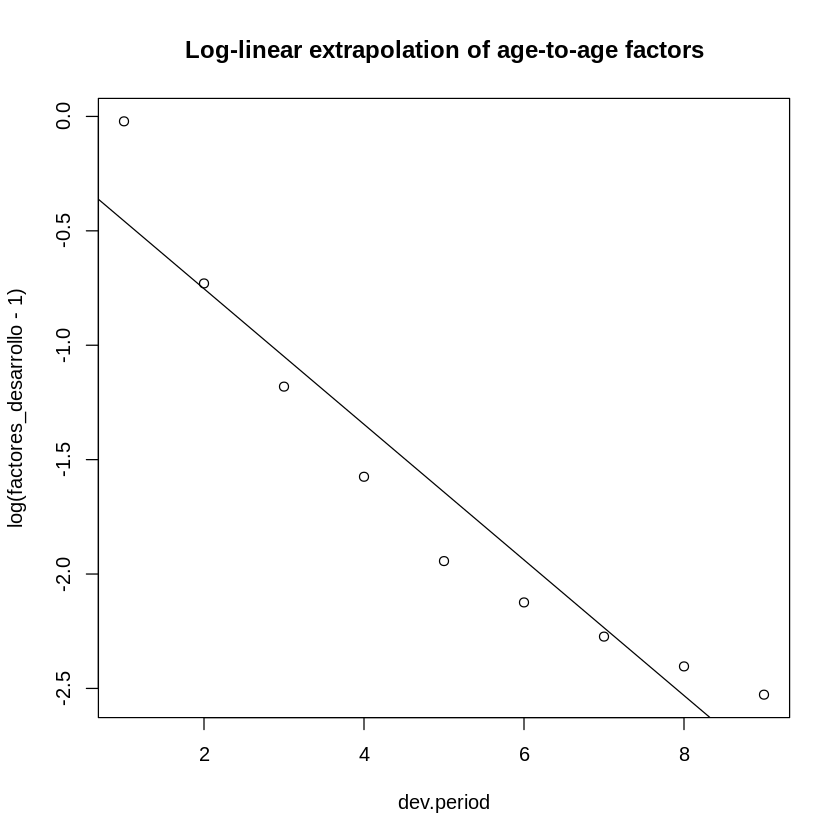

In [78]:
dev.period <- 1:(n-1)
plot(log(factores_desarrollo -1) ~ dev.period,
     main="Log-linear extrapolation of age-to-age factors")
tail.model <- lm(log(factores_desarrollo -1) ~ dev.period)
abline(tail.model)

Ahora se extrapolan estos factores 100 veces

In [79]:
co <- coef(tail.model)

tail <- exp(co[1] + c(n:(n + 100)) * co[2]) + 1
factores_desarrollo.tail <- prod(tail)
factores_desarrollo.tail

[1] 1.184606


Los factores de desarrollo de un periodo a otro nos permiten representar gráficamente los patrones esperados de desarrollo de reclamaciones.

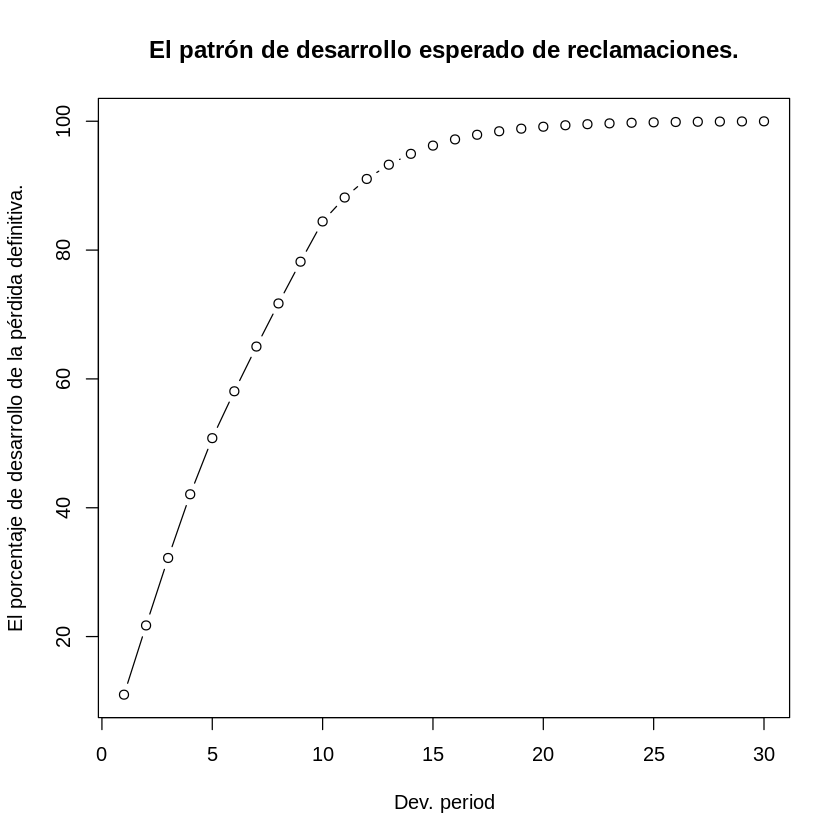

In [80]:
plot(100*(rev(1/cumprod(rev(c(factores_desarrollo, tail[tail>1.0001]))))), t="b",
     main="El patrón de desarrollo esperado de reclamaciones.",
     xlab="Dev. period", ylab="El porcentaje de desarrollo de la pérdida definitiva.")

Luego, los ratios de enlace se aplican al monto acumulado de reclamaciones más reciente conocido para predecir el próximo período de desarrollo. A continuación, se calcula la cuadratura del triángulo de promutual, donde se agrega una columna final a la derecha para acomodar el desarrollo esperado más allá del periodo más antiguo (10) del triángulo debido al factor de cola (1.184) siendo mayor que la unidad.

In [81]:
factores_desarrollo  <- c(factores_desarrollo  , factores_desarrollo.tail)
fullPromutual_acumulativo <- cbind(Promutual_acumulativo, Ult = rep(0, 10))
for(k in 1:n){
  fullPromutual_acumulativo[(n-k+1):n, k+1] <- fullPromutual_acumulativo[(n-k+1):n,k]*factores_desarrollo [k]
}
round(fullPromutual_acumulativo)

,0,1,2,3,4,5,6,7,8,9,Ult
1988,43393,82953,133351,179981,223988,253988,281159,308554,335588,362392,429292
1989,23460,77938,128571,175509,209941,240347,270755,300549,328563,354806,420305
1990,44843,85248,123765,153426,176985,200254,223067,245661,267863,289257,342656
1991,40715,85394,120904,154776,187489,218360,247094,272532,297162,320897,380136
1992,55743,100052,133936,163659,194613,222278,248847,274466,299271,323174,382834
1993,49446,80206,108047,145226,180913,206822,231543,255380,278461,300702,356213
1994,33465,65903,104361,142206,171647,196229,219684,242300,264198,285300,337968
1995,32837,65286,99936,130616,157657,180236,201779,222552,242666,262048,310423
1996,34711,66646,98767,129088,155813,178127,199419,219948,239826,258982,306791
1997,34107,67491,100019,130725,157789,180386,201948,222738,242868,262266,310682


In [82]:
sum(fullPromutual_acumulativo[ ,11] - getLatestCumulative(Promutual_acumulativo))

[1] 1647504


La pérdida total estimada pendiente bajo este método es de aproximadamente 1647503 teniendo en cuenta que estrapolamos un periodo adicional.

In [83]:
comparativo_IBNR_Deterministico <- data.frame(Real = 1377449, Estimado = 1647503.87260065,Diferencia = ( 1377449- 1647503.87260065)/1377449)
comparativo_IBNR_Deterministico

Real,Estimado,Diferencia
<dbl>,<dbl>,<dbl>
1377449,1647504,-0.1960544


# **IBNR, modelo lineal y Chain Ladder**

Para en análisis de la reserva por regresión lineal, lo primero que se necesita es el triángulo desacumulado.


In [84]:
Promutual3.tri <- as.triangle(resultados_arriba[[2]],
                       origin="Año_Accidente",
                       dev="periodo_desarrollo",
                       value="Incurridos_año")
Promutual3.tri

,0,1,2,3,4,5,6,7,8,9
1988,43393,39560,50398,46630,44007,30000,27171,27395,27034,26804
1989,23460,54478,50633,46938,34432,30406,30408,29794,28014,NA
1990,44843,40405,38517,29661,23559,23269,22813,22594,NA,NA
1991,40715,44679,35510,33872,32713,30871,28734,NA,NA,NA
1992,55743,44309,33884,29723,30954,27665,NA,NA,NA,NA
1993,49446,30760,27841,37179,35687,NA,NA,NA,NA,NA
1994,33465,32438,38458,37845,NA,NA,NA,NA,NA,NA
1995,32837,32449,34650,NA,NA,NA,NA,NA,NA,NA
1996,34711,31935,NA,NA,NA,NA,NA,NA,NA,NA
1997,34107,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [85]:
resultados_abajo[[2]]

,0,1,2,3,4,5,6,7,8,9
1988,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989,NA,NA,NA,NA,NA,NA,NA,NA,NA,27703
1990,NA,NA,NA,NA,NA,NA,NA,NA,21804,20984
1991,NA,NA,NA,NA,NA,NA,NA,30627,30151,30413
1992,NA,NA,NA,NA,NA,NA,27067,26018,25603,25666
1993,NA,NA,NA,NA,NA,35936,37005,38270,38382,37760
1994,NA,NA,NA,NA,35062,36552,36388,36294,36371,36409
1995,NA,NA,NA,30941,28954,29424,28768,28557,29521,29500
1996,NA,NA,27963,25959,29673,31900,33123,31773,33051,32644
1997,NA,29536,26174,24997,26237,28330,30665,29690,29928,29676


como supuesto para implementar esta metología, se tiene que la información tiene una distribución log-normal. Por esta razón el primer paso será calgular el logarirtmo de los siniestros de nuestro triángulo conocido.

In [86]:
Promutual3.tri <- as.triangle((resultados_arriba[[2]]),
                       origin="Año_Accidente",
                       dev="periodo_desarrollo",
                       value="Incurridos_año")
log(Promutual3.tri)

,0,1,2,3,4,5,6,7,8,9
1988,10.67805,10.58557,10.82771,10.75000,10.69210,10.30895,10.20991,10.21812,10.20485,10.19631
1989,10.06305,10.90555,10.83236,10.75658,10.44674,10.32240,10.32246,10.30206,10.24046,NA
1990,10.71092,10.60671,10.55885,10.29759,10.06726,10.05488,10.03509,10.02544,NA,NA
1991,10.61435,10.70726,10.47757,10.43034,10.39553,10.33757,10.26584,NA,NA,NA
1992,10.92851,10.69894,10.43070,10.29968,10.34026,10.22792,NA,NA,NA,NA
1993,10.80864,10.33397,10.23427,10.52350,10.48254,NA,NA,NA,NA,NA
1994,10.41826,10.38709,10.55732,10.54125,NA,NA,NA,NA,NA,NA
1995,10.39931,10.38742,10.45305,NA,NA,NA,NA,NA,NA,NA
1996,10.45481,10.37146,NA,NA,NA,NA,NA,NA,NA,NA
1997,10.43726,NA,NA,NA,NA,NA,NA,NA,NA,NA


Una vez se obtiene el logaritmo de la información, se procede a representar la información del triángulo superior como un vector Y, que corresponde al logaritmo de los incurridos conocido.


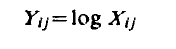

In [87]:
log_incurridos <- log(Promutual3.tri)
log_incurridos

,0,1,2,3,4,5,6,7,8,9
1988,10.67805,10.58557,10.82771,10.75000,10.69210,10.30895,10.20991,10.21812,10.20485,10.19631
1989,10.06305,10.90555,10.83236,10.75658,10.44674,10.32240,10.32246,10.30206,10.24046,NA
1990,10.71092,10.60671,10.55885,10.29759,10.06726,10.05488,10.03509,10.02544,NA,NA
1991,10.61435,10.70726,10.47757,10.43034,10.39553,10.33757,10.26584,NA,NA,NA
1992,10.92851,10.69894,10.43070,10.29968,10.34026,10.22792,NA,NA,NA,NA
1993,10.80864,10.33397,10.23427,10.52350,10.48254,NA,NA,NA,NA,NA
1994,10.41826,10.38709,10.55732,10.54125,NA,NA,NA,NA,NA,NA
1995,10.39931,10.38742,10.45305,NA,NA,NA,NA,NA,NA,NA
1996,10.45481,10.37146,NA,NA,NA,NA,NA,NA,NA,NA
1997,10.43726,NA,NA,NA,NA,NA,NA,NA,NA,NA


Triangulo de abajo

In [88]:
trainagulo_abajo_638 <-  resultados_abajo[[2]]
log_incurridos_real <- log(trainagulo_abajo_638 )
log_incurridos_real

,0,1,2,3,4,5,6,7,8,9
1988,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989,NA,NA,NA,NA,NA,NA,NA,NA,NA,10.229296
1990,NA,NA,NA,NA,NA,NA,NA,NA,9.989849,9.951516
1991,NA,NA,NA,NA,NA,NA,NA,10.32964,10.313973,10.322625
1992,NA,NA,NA,NA,NA,NA,10.20607,10.16654,10.150465,10.152922
1993,NA,NA,NA,NA,NA,10.48949,10.51881,10.55242,10.555344,10.539006
1994,NA,NA,NA,NA,10.46487,10.50649,10.50199,10.49941,10.501527,10.502571
1995,NA,NA,NA,10.33984,10.27346,10.28957,10.26702,10.25966,10.292857,10.292146
1996,NA,NA,10.23864,10.16427,10.29799,10.37036,10.40798,10.36637,10.405807,10.393416
1997,NA,10.29337,10.17252,10.12651,10.17493,10.25168,10.33088,10.29857,10.306550,10.298094


In [89]:
incurridos_vector_real <- as.vector(trainagulo_abajo_638)
incurridos_vector_real

[1]    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA    NA
 [13]    NA    NA    NA    NA    NA    NA    NA 29536    NA    NA    NA    NA
 [25]    NA    NA    NA    NA 27963 26174    NA    NA    NA    NA    NA    NA
 [37]    NA 30941 25959 24997    NA    NA    NA    NA    NA    NA 35062 28954
 [49] 29673 26237    NA    NA    NA    NA    NA 35936 36552 29424 31900 28330
 [61]    NA    NA    NA    NA 27067 37005 36388 28768 33123 30665    NA    NA
 [73]    NA 30627 26018 38270 36294 28557 31773 29690    NA    NA 21804 30151
 [85] 25603 38382 36371 29521 33051 29928    NA 27703 20984 30413 25666 37760
 [97] 36409 29500 32644 29676

In [90]:
incurridos_real_no_na <- incurridos_vector_real[!is.na(incurridos_vector_real)]
length(incurridos_real_no_na)
length

[1] 45

function (x)  .Primitive("length")

Se hace lo mismo pero para el triángulo de arriba

In [91]:
incurridos_vector <- as.vector(log_incurridos)
incurridos_vector

[1] 10.67805 10.06305 10.71092 10.61435 10.92851 10.80864 10.41826 10.39931
  [9] 10.45481 10.43726 10.58557 10.90555 10.60671 10.70726 10.69894 10.33397
 [17] 10.38709 10.38742 10.37146       NA 10.82771 10.83236 10.55885 10.47757
 [25] 10.43070 10.23427 10.55732 10.45305       NA       NA 10.75000 10.75658
 [33] 10.29759 10.43034 10.29968 10.52350 10.54125       NA       NA       NA
 [41] 10.69210 10.44674 10.06726 10.39553 10.34026 10.48254       NA       NA
 [49]       NA       NA 10.30895 10.32240 10.05488 10.33757 10.22792       NA
 [57]       NA       NA       NA       NA 10.20991 10.32246 10.03509 10.26584
 [65]       NA       NA       NA       NA       NA       NA 10.21812 10.30206
 [73] 10.02544       NA       NA       NA       NA       NA       NA       NA
 [81] 10.20485 10.24046       NA       NA       NA       NA       NA       NA
 [89]       NA       NA 10.19631       NA       NA       NA       NA       NA
 [97]       NA       NA       NA       NA

In [92]:
incurridos_no_na <- incurridos_vector[!is.na(incurridos_vector)]
incurridos_no_na

[1] 10.67805 10.06305 10.71092 10.61435 10.92851 10.80864 10.41826 10.39931
 [9] 10.45481 10.43726 10.58557 10.90555 10.60671 10.70726 10.69894 10.33397
[17] 10.38709 10.38742 10.37146 10.82771 10.83236 10.55885 10.47757 10.43070
[25] 10.23427 10.55732 10.45305 10.75000 10.75658 10.29759 10.43034 10.29968
[33] 10.52350 10.54125 10.69210 10.44674 10.06726 10.39553 10.34026 10.48254
[41] 10.30895 10.32240 10.05488 10.33757 10.22792 10.20991 10.32246 10.03509
[49] 10.26584 10.21812 10.30206 10.02544 10.20485 10.24046 10.19631

In [93]:
longitud <- length(incurridos_no_na )
print(longitud)

[1] 55


Visualizar el vector Y, como columna

In [94]:
incurridos_vector <- for (i in 1:length(incurridos_vector)) {
  cat("Índice", i, ":", incurridos_vector[i], "\n")
}

Índice 1 : 10.67805 
Índice 2 : 10.06305 
Índice 3 : 10.71092 
Índice 4 : 10.61435 
Índice 5 : 10.92851 
Índice 6 : 10.80864 
Índice 7 : 10.41826 
Índice 8 : 10.39931 
Índice 9 : 10.45481 
Índice 10 : 10.43726 
Índice 11 : 10.58557 
Índice 12 : 10.90555 
Índice 13 : 10.60671 
Índice 14 : 10.70726 
Índice 15 : 10.69894 
Índice 16 : 10.33397 
Índice 17 : 10.38709 
Índice 18 : 10.38742 
Índice 19 : 10.37146 
Índice 20 : NA 
Índice 21 : 10.82771 
Índice 22 : 10.83236 
Índice 23 : 10.55885 
Índice 24 : 10.47757 
Índice 25 : 10.4307 
Índice 26 : 10.23427 
Índice 27 : 10.55732 
Índice 28 : 10.45305 
Índice 29 : NA 
Índice 30 : NA 
Índice 31 : 10.75 
Índice 32 : 10.75658 
Índice 33 : 10.29759 
Índice 34 : 10.43034 
Índice 35 : 10.29968 
Índice 36 : 10.5235 
Índice 37 : 10.54125 
Índice 38 : NA 
Índice 39 : NA 
Índice 40 : NA 
Índice 41 : 10.6921 
Índice 42 : 10.44674 
Índice 43 : 10.06726 
Índice 44 : 10.39553 
Índice 45 : 10.34026 
Índice 46 : 10.48254 
Índice 47 : NA 
Índice 48 : NA 
Índice 

Ahora se procede a construir la matriz x de ceros y unos

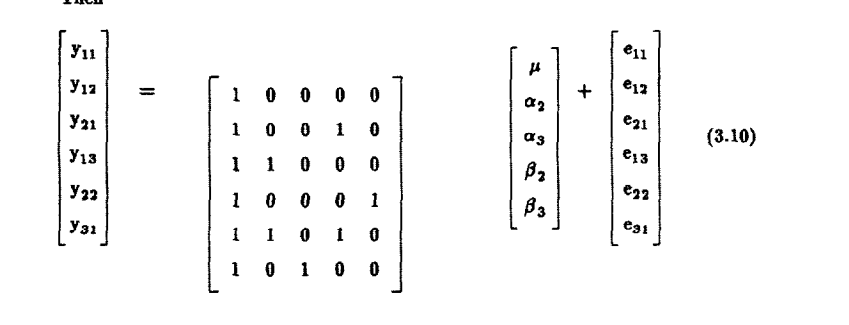

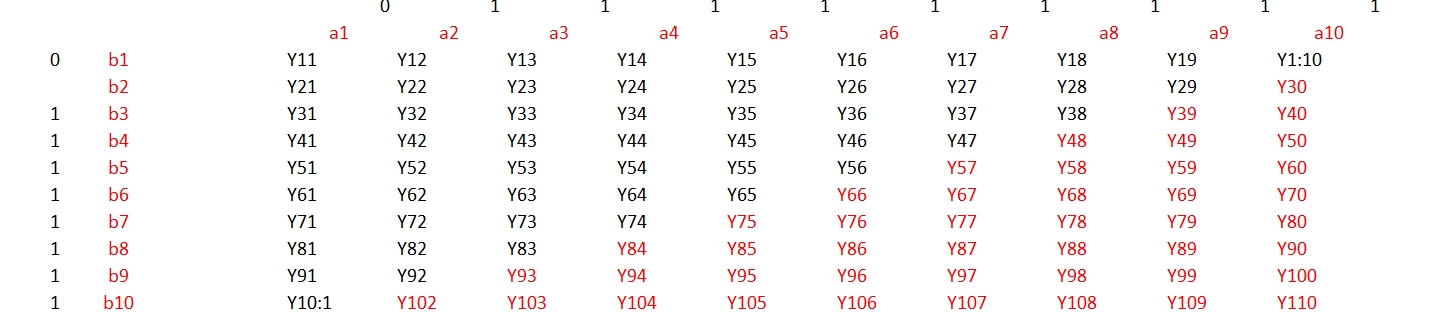

lo primero es construir una matriz de ceros que tamaño 19 ( cantidad de para´metros por estimar) por 55 ( datos del triángulo superior)


In [95]:
matriz_ceros <- matrix(0, nrow = 100, ncol = 19)
print(matriz_ceros)

       [,1] [,2] [,3] [,4] [,5] [,6] [,7] [,8] [,9] [,10] [,11] [,12] [,13]
  [1,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [2,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [3,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [4,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [5,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [6,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [7,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [8,]    0    0    0    0    0    0    0    0    0     0     0     0     0
  [9,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [10,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [11,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [12,]    0    0    0    0    0    0    0    0    0     0     0     0     0
 [13,]    0 

Ahora construimos en for para empezar a llenar la matriz

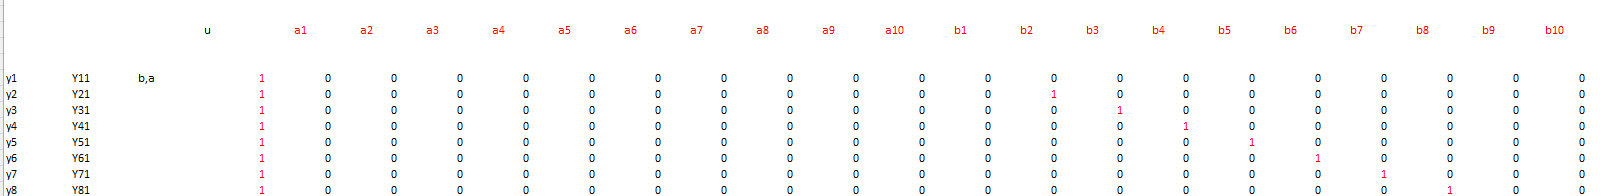

como el primer elemento de nuestro vector de parámetros es u, la media de la regresión lineal, sabemos que esta primer columna siempre nedré unos.

In [96]:
size <- 10
matriz_ceros <- matrix(0, nrow = size * size, ncol = size * 2 - 1)


In [97]:
#size <- 55
#matriz_ceros <- matrix(0, nrow = size , ncol = 19)


In [98]:
for (i in 1:size) {
  for (j in 1:size) {
    k <- (i - 1) * size + j
    if (i != 1) {
      matriz_ceros[k, i] <- 1
    }
    if (j != 1) {
      matriz_ceros[k, (j + (size - 1))] <- 1
    }
  }
}

In [99]:
matriz_ceros_df <- as.data.frame(matriz_ceros)
matriz_ceros_df

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [100]:
matriz_ceros[,1] <- 1
matriz_ceros_df <- as.data.frame(matriz_ceros)
print(matriz_ceros_df)

    V1 V2 V3 V4 V5 V6 V7 V8 V9 V10 V11 V12 V13 V14 V15 V16 V17 V18 V19
1    1  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0
2    1  0  0  0  0  0  0  0  0   0   1   0   0   0   0   0   0   0   0
3    1  0  0  0  0  0  0  0  0   0   0   1   0   0   0   0   0   0   0
4    1  0  0  0  0  0  0  0  0   0   0   0   1   0   0   0   0   0   0
5    1  0  0  0  0  0  0  0  0   0   0   0   0   1   0   0   0   0   0
6    1  0  0  0  0  0  0  0  0   0   0   0   0   0   1   0   0   0   0
7    1  0  0  0  0  0  0  0  0   0   0   0   0   0   0   1   0   0   0
8    1  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   1   0   0
9    1  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   1   0
10   1  0  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   1
11   1  1  0  0  0  0  0  0  0   0   0   0   0   0   0   0   0   0   0
12   1  1  0  0  0  0  0  0  0   0   1   0   0   0   0   0   0   0   0
13   1  1  0  0  0  0  0  0  0   0   0   1   0   0   0   0   0   0   0
14   1

CAMBIAR NOMBRES

recordado que a1 y b1 son igual a cero

In [101]:
nuevos_nombres <- c("U", "a2","a3","a4","a5","a6","a7","a8","a9","a10", "b2","b3","b4","b5","b6","b7","b8","b9","b10")  # Reemplaza ... con los nombres deseados
colnames(matriz_ceros_df) <- nuevos_nombres
matriz_ceros_df

U,a2,a3,a4,a5,a6,a7,a8,a9,a10,b2,b3,b4,b5,b6,b7,b8,b9,b10
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Genero una única tabla uniendo el vector Y y la matriz X que acabamos de construir

In [102]:
incurridos_vector <- as.vector(log_incurridos)
incurridos_vector

[1] 10.67805 10.06305 10.71092 10.61435 10.92851 10.80864 10.41826 10.39931
  [9] 10.45481 10.43726 10.58557 10.90555 10.60671 10.70726 10.69894 10.33397
 [17] 10.38709 10.38742 10.37146       NA 10.82771 10.83236 10.55885 10.47757
 [25] 10.43070 10.23427 10.55732 10.45305       NA       NA 10.75000 10.75658
 [33] 10.29759 10.43034 10.29968 10.52350 10.54125       NA       NA       NA
 [41] 10.69210 10.44674 10.06726 10.39553 10.34026 10.48254       NA       NA
 [49]       NA       NA 10.30895 10.32240 10.05488 10.33757 10.22792       NA
 [57]       NA       NA       NA       NA 10.20991 10.32246 10.03509 10.26584
 [65]       NA       NA       NA       NA       NA       NA 10.21812 10.30206
 [73] 10.02544       NA       NA       NA       NA       NA       NA       NA
 [81] 10.20485 10.24046       NA       NA       NA       NA       NA       NA
 [89]       NA       NA 10.19631       NA       NA       NA       NA       NA
 [97]       NA       NA       NA       NA

In [103]:
concatenado <- cbind(matriz_ceros_df, incurridos_vector)
concatenado

U,a2,a3,a4,a5,a6,a7,a8,a9,a10,b2,b3,b4,b5,b6,b7,b8,b9,b10,incurridos_vector
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.67805
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,10.06305
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,10.71092
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,10.61435
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,10.92851
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,10.80864
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10.41826
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10.39931
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,10.45481


Ahora se quitan filas con NA

In [104]:
MATRIZ_X_sin_na <- na.omit(concatenado)
MATRIZ_X_sin_na

,U,a2,a3,a4,a5,a6,a7,a8,a9,a10,b2,b3,b4,b5,b6,b7,b8,b9,b10,incurridos_vector
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.67805
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,10.06305
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,10.71092
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,10.61435
5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,10.92851
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,10.80864
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10.41826
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10.39931
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,10.45481


Se extrae la matriz de interés, la cual correspone a la parte superior del triángulo y con la cual se calculan los parámetros.

In [105]:
MATRIZ_X <- MATRIZ_X_sin_na [, -ncol(MATRIZ_X_sin_na )]
MATRIZ_X

,U,a2,a3,a4,a5,a6,a7,a8,a9,a10,b2,b3,b4,b5,b6,b7,b8,b9,b10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


como ya se tiene el vector de Y de incurridos y la matriz X, se puede usar la siguiente fórmula para estimar los parámetros

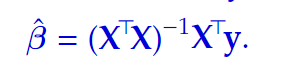

se calcula la matriz transpuesta

In [106]:
matriz_transpuesta <- t(MATRIZ_X)
matriz_transpuesta
matriz_transpuesta <- as.data.frame(matriz_transpuesta )

,1,2,3,4,5,6,7,8,9,10,⋯,61,62,63,64,71,72,73,81,82,91
U,1,1,1,1,1,1,1,1,1,1,⋯,1,1,1,1,1,1,1,1,1,1
a2,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a4,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a5,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a6,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
a7,0,0,0,0,0,0,0,0,0,0,⋯,1,1,1,1,0,0,0,0,0,0
a8,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,1,1,1,0,0,0
a9,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,1,1,0
a10,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,1


In [107]:
matriz1 <- as.matrix(matriz_transpuesta)
matriz2 <- as.matrix(MATRIZ_X)

SE MULTIPLICAN DOS MATRICES

In [108]:
multiplicacion_matricial <- matriz1 %*% matriz2
multiplicacion_matricial

,U,a2,a3,a4,a5,a6,a7,a8,a9,a10,b2,b3,b4,b5,b6,b7,b8,b9,b10
U,55,9,8,7,6,5,4,3,2,1,9,8,7,6,5,4,3,2,1
a2,9,9,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0
a3,8,0,8,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0
a4,7,0,0,7,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0
a5,6,0,0,0,6,0,0,0,0,0,1,1,1,1,1,0,0,0,0
a6,5,0,0,0,0,5,0,0,0,0,1,1,1,1,0,0,0,0,0
a7,4,0,0,0,0,0,4,0,0,0,1,1,1,0,0,0,0,0,0
a8,3,0,0,0,0,0,0,3,0,0,1,1,0,0,0,0,0,0,0
a9,2,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0
a10,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [109]:
multiplicacion_matricial_df <- as.data.frame(multiplicacion_matricial)
multiplicacion_matricial_df

,U,a2,a3,a4,a5,a6,a7,a8,a9,a10,b2,b3,b4,b5,b6,b7,b8,b9,b10
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
U,55,9,8,7,6,5,4,3,2,1,9,8,7,6,5,4,3,2,1
a2,9,9,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,0
a3,8,0,8,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,0
a4,7,0,0,7,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0
a5,6,0,0,0,6,0,0,0,0,0,1,1,1,1,1,0,0,0,0
a6,5,0,0,0,0,5,0,0,0,0,1,1,1,1,0,0,0,0,0
a7,4,0,0,0,0,0,4,0,0,0,1,1,1,0,0,0,0,0,0
a8,3,0,0,0,0,0,0,3,0,0,1,1,0,0,0,0,0,0,0
a9,2,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0


Sacar inversa de la matriz anterior


In [110]:
matriz3 <- as.matrix(multiplicacion_matricial_df)

In [111]:
matriz_inversa <- solve(matriz3)
matriz_inversa

,U,a2,a3,a4,a5,a6,a7,a8,a9,a10,b2,b3,b4,b5,b6,b7,b8,b9,b10
U,0.2332540,-1.111111e-01,-1.180556e-01,-1.240079e-01,-1.299603e-01,-1.366270e-01,-1.449603e-01,-1.568651e-01,-1.776984e-01,-0.2332540,-1.111111e-01,-1.180556e-01,-1.240079e-01,-1.299603e-01,-1.366270e-01,-1.449603e-01,-1.568651e-01,-1.776984e-01,-0.2332540
a2,-0.1111111,2.222222e-01,1.111111e-01,1.111111e-01,1.111111e-01,1.111111e-01,1.111111e-01,1.111111e-01,1.111111e-01,0.1111111,-2.829611e-17,-2.798672e-17,-2.488513e-17,-3.255988e-17,-3.607282e-17,-4.166636e-17,-3.458508e-17,-4.240435e-17,0.1111111
a3,-0.1180556,1.111111e-01,2.430556e-01,1.180556e-01,1.180556e-01,1.180556e-01,1.180556e-01,1.180556e-01,1.180556e-01,0.1180556,-3.135469e-17,-3.475894e-17,-3.832249e-17,-3.384859e-17,-3.841638e-17,-4.054439e-17,-4.514846e-17,6.250000e-02,0.1180556
a4,-0.1240079,1.111111e-01,1.180556e-01,2.668651e-01,1.240079e-01,1.240079e-01,1.240079e-01,1.240079e-01,1.240079e-01,0.1240079,-4.003809e-17,-4.225868e-17,-4.175467e-17,-5.065174e-17,-5.187921e-17,-4.704224e-17,4.761905e-02,6.845238e-02,0.1240079
a5,-0.1299603,1.111111e-01,1.180556e-01,1.240079e-01,2.966270e-01,1.299603e-01,1.299603e-01,1.299603e-01,1.299603e-01,0.1299603,-3.595363e-17,-3.421394e-17,-4.080070e-17,-5.312880e-17,-5.019133e-17,4.166667e-02,5.357143e-02,7.440476e-02,0.1299603
a6,-0.1366270,1.111111e-01,1.180556e-01,1.240079e-01,1.299603e-01,3.366270e-01,1.366270e-01,1.366270e-01,1.366270e-01,0.1366270,-3.005557e-17,-2.406002e-17,-2.949030e-17,-4.336809e-17,4.000000e-02,4.833333e-02,6.023810e-02,8.107143e-02,0.1366270
a7,-0.1449603,1.111111e-01,1.180556e-01,1.240079e-01,1.299603e-01,1.366270e-01,3.949603e-01,1.449603e-01,1.449603e-01,0.1449603,-4.046391e-17,-3.967253e-17,-4.336809e-17,4.166667e-02,4.833333e-02,5.666667e-02,6.857143e-02,8.940476e-02,0.1449603
a8,-0.1568651,1.111111e-01,1.180556e-01,1.240079e-01,1.299603e-01,1.366270e-01,1.449603e-01,4.901984e-01,1.568651e-01,0.1568651,-4.092168e-17,-3.914248e-17,4.761905e-02,5.357143e-02,6.023810e-02,6.857143e-02,8.047619e-02,1.013095e-01,0.1568651
a9,-0.1776984,1.111111e-01,1.180556e-01,1.240079e-01,1.299603e-01,1.366270e-01,1.449603e-01,1.568651e-01,6.776984e-01,0.1776984,-6.970434e-17,6.250000e-02,6.845238e-02,7.440476e-02,8.107143e-02,8.940476e-02,1.013095e-01,1.221429e-01,0.1776984
a10,-0.2332540,1.111111e-01,1.180556e-01,1.240079e-01,1.299603e-01,1.366270e-01,1.449603e-01,1.568651e-01,1.776984e-01,1.2332540,1.111111e-01,1.180556e-01,1.240079e-01,1.299603e-01,1.366270e-01,1.449603e-01,1.568651e-01,1.776984e-01,0.2332540


In [112]:
multiplicacion_matricial_3 <-matriz_inversa %*% matriz1
multiplicacion_matricial_3

,1,2,3,4,5,6,7,8,9,10,⋯,61,62,63,64,71,72,73,81,82,91
U,0.2332540,0.122142857,1.151984e-01,1.092460e-01,1.032937e-01,9.662698e-02,8.829365e-02,7.638889e-02,5.555556e-02,-5.551115e-17,⋯,8.829365e-02,-2.281746e-02,-2.976190e-02,-3.571429e-02,7.638889e-02,-3.472222e-02,-4.166667e-02,5.555556e-02,-5.555556e-02,0.000000e+00
a2,-0.1111111,-0.111111111,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,-1.111111e-01,0.000000e+00,⋯,-1.387779e-17,-4.217390e-17,-4.186451e-17,-3.876292e-17,-2.775558e-17,-5.605169e-17,-5.574229e-17,-4.163336e-17,-6.992948e-17,-1.387779e-17
a3,-0.1180556,-0.118055556,-1.180556e-01,-1.180556e-01,-1.180556e-01,-1.180556e-01,-1.180556e-01,-1.180556e-01,-5.555556e-02,0.000000e+00,⋯,0.000000e+00,-3.135469e-17,-3.475894e-17,-3.832249e-17,0.000000e+00,-3.135469e-17,-3.475894e-17,-2.775558e-17,-5.911027e-17,-2.775558e-17
a4,-0.1240079,-0.124007937,-1.240079e-01,-1.240079e-01,-1.240079e-01,-1.240079e-01,-1.240079e-01,-7.638889e-02,-5.555556e-02,0.000000e+00,⋯,1.387779e-17,-2.616031e-17,-2.838089e-17,-2.787688e-17,0.000000e+00,-4.003809e-17,-4.225868e-17,-1.387779e-17,-5.391588e-17,0.000000e+00
a5,-0.1299603,-0.129960317,-1.299603e-01,-1.299603e-01,-1.299603e-01,-1.299603e-01,-8.829365e-02,-7.638889e-02,-5.555556e-02,2.775558e-17,⋯,2.775558e-17,-8.198051e-18,-6.458361e-18,-1.304512e-17,2.775558e-17,-8.198051e-18,-6.458361e-18,0.000000e+00,-3.595363e-17,0.000000e+00
a6,-0.1366270,-0.136626984,-1.366270e-01,-1.366270e-01,-1.366270e-01,-9.662698e-02,-8.829365e-02,-7.638889e-02,-5.555556e-02,0.000000e+00,⋯,0.000000e+00,-3.005557e-17,-2.406002e-17,-2.949030e-17,-2.775558e-17,-5.781114e-17,-5.181560e-17,-5.551115e-17,-8.556672e-17,0.000000e+00
a7,-0.1449603,-0.144960317,-1.449603e-01,-1.449603e-01,-1.032937e-01,-9.662698e-02,-8.829365e-02,-7.638889e-02,-5.555556e-02,0.000000e+00,⋯,2.500000e-01,2.500000e-01,2.500000e-01,2.500000e-01,-2.775558e-17,-6.821948e-17,-6.742811e-17,-5.551115e-17,-9.597506e-17,-2.775558e-17
a8,-0.1568651,-0.156865079,-1.568651e-01,-1.092460e-01,-1.032937e-01,-9.662698e-02,-8.829365e-02,-7.638889e-02,-5.555556e-02,0.000000e+00,⋯,-1.190476e-02,-1.190476e-02,-1.190476e-02,3.571429e-02,3.333333e-01,3.333333e-01,3.333333e-01,-5.551115e-17,-9.643283e-17,0.000000e+00
a9,-0.1776984,-0.177698413,-1.151984e-01,-1.092460e-01,-1.032937e-01,-9.662698e-02,-8.829365e-02,-7.638889e-02,-5.555556e-02,0.000000e+00,⋯,-3.273810e-02,-3.273810e-02,2.976190e-02,3.571429e-02,-2.083333e-02,-2.083333e-02,4.166667e-02,5.000000e-01,5.000000e-01,0.000000e+00
a10,-0.2332540,-0.122142857,-1.151984e-01,-1.092460e-01,-1.032937e-01,-9.662698e-02,-8.829365e-02,-7.638889e-02,-5.555556e-02,0.000000e+00,⋯,-8.829365e-02,2.281746e-02,2.976190e-02,3.571429e-02,-7.638889e-02,3.472222e-02,4.166667e-02,-5.555556e-02,5.555556e-02,1.000000e+00


In [113]:
incurridos_no_na <- incurridos_vector[!is.na(incurridos_vector)]
incurridos_no_na

[1] 10.67805 10.06305 10.71092 10.61435 10.92851 10.80864 10.41826 10.39931
 [9] 10.45481 10.43726 10.58557 10.90555 10.60671 10.70726 10.69894 10.33397
[17] 10.38709 10.38742 10.37146 10.82771 10.83236 10.55885 10.47757 10.43070
[25] 10.23427 10.55732 10.45305 10.75000 10.75658 10.29759 10.43034 10.29968
[33] 10.52350 10.54125 10.69210 10.44674 10.06726 10.39553 10.34026 10.48254
[41] 10.30895 10.32240 10.05488 10.33757 10.22792 10.20991 10.32246 10.03509
[49] 10.26584 10.21812 10.30206 10.02544 10.20485 10.24046 10.19631

In [114]:
longitud <- length(incurridos_no_na)
print(longitud)

[1] 55


In [115]:
parametros <-multiplicacion_matricial_3 %*% incurridos_no_na
parametros

U,10.73344549
a2,-0.01021405
a3,-0.03572899
a4,-0.09001978
a5,-0.21577950
a6,-0.38409216
a7,-0.43214661
a8,-0.46273140
a9,-0.49503502
a10,-0.53713908
b2,-0.03151067


In [116]:
estimaciones <- matriz2  %*% parametros
estimaciones

1,10.73345
2,10.70193
3,10.49843
4,10.62806
5,10.61031
6,10.54693
7,10.50997
8,10.42858
9,10.41824
10,10.43726
11,10.72323


Comparación con el estimado y el real

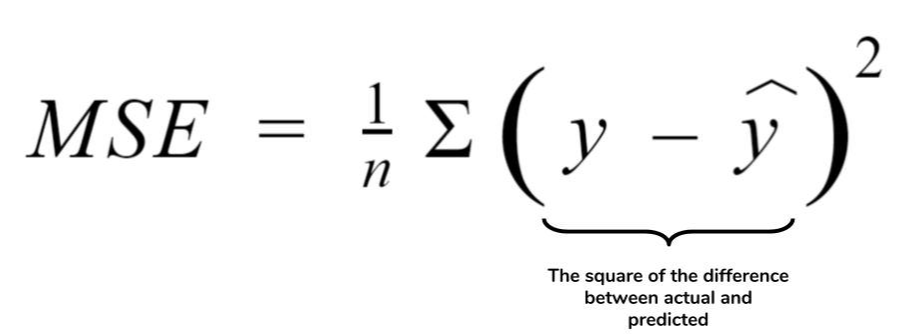

In [117]:
comparativo <- data.frame(Estimado = estimaciones, Real = incurridos_no_na, Diferencia = (incurridos_no_na- estimaciones)^2)
comparativo

,Estimado,Real,Diferencia
,<dbl>,<dbl>,<dbl>
1,10.73345,10.67805,3.068282e-03
2,10.70193,10.06305,4.081711e-01
3,10.49843,10.71092,4.515247e-02
4,10.62806,10.61435,1.879999e-04
5,10.61031,10.92851,1.012515e-01
6,10.54693,10.80864,6.848971e-02
7,10.50997,10.41826,8.411579e-03
8,10.42858,10.39931,8.565090e-04
9,10.41824,10.45481,1.337365e-03


In [118]:
MSE  <-  sum(comparativo$Diferencia)/55
MSE

[1] 0.02241576

Ahora nos devolvemos sacando expoencial al vector de parámetros

In [119]:
parametros_originales <- exp(parametros)
parametros_originales

U,4.586445e+04
a2,9.898379e-01
a3,9.649018e-01
a4,9.139131e-01
a5,8.059130e-01
a6,6.810687e-01
a7,6.491142e-01
a8,6.295617e-01
a9,6.095496e-01
a10,5.844178e-01
b2,9.689806e-01


Para calcular mi reserva, necesito la matriz correspondiente a los NA

In [120]:
concatenado <- cbind(matriz_ceros_df, incurridos_vector)
concatenado

U,a2,a3,a4,a5,a6,a7,a8,a9,a10,b2,b3,b4,b5,b6,b7,b8,b9,b10,incurridos_vector
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10.67805
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,10.06305
1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,10.71092
1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,10.61435
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,10.92851
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,10.80864
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,10.41826
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,10.39931
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,10.45481


In [121]:
MATRIZ_X_na <- (concatenado[!complete.cases(concatenado), ])
MATRIZ_X_NA <- MATRIZ_X_na  [, -ncol(MATRIZ_X_na )]
MATRIZ_X_na

,U,a2,a3,a4,a5,a6,a7,a8,a9,a10,b2,b3,b4,b5,b6,b7,b8,b9,b10,incurridos_vector
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
20,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NA
29,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NA
30,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NA
38,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NA
39,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NA
40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,NA
47,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,NA
48,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,NA
49,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,NA


In [122]:
matriz4 <- as.matrix(MATRIZ_X_NA )
matriz4

,U,a2,a3,a4,a5,a6,a7,a8,a9,a10,b2,b3,b4,b5,b6,b7,b8,b9,b10
20,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
29,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
30,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
38,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
39,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
40,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
47,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
48,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
49,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0
50,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [123]:
IBNR  <- matriz4  %*% parametros_originales
IBNR

20,45866.18
29,45866.14
30,45866.15
38,45866.10
39,45866.09
40,45866.10
47,45866.05
48,45865.99
49,45865.98
50,45866.00
56,45865.96


In [124]:
IBNR_TOTAL  <- sum(IBNR)
IBNR_TOTAL

[1] 2063966

In [125]:
sum(fullPromutual_acumulativo[ ,11] - getLatestCumulative(Promutual_acumulativo))

[1] 1647504

In [126]:
comparativo_IBNR <- data.frame(Regresion = 2063966.20693671, chain_ladder = 1647503.87260065,Diferencia = ( 1647503.87260065- 2063966.20693671)/1647503.87260065)
comparativo_IBNR

Regresion,chain_ladder,Diferencia
<dbl>,<dbl>,<dbl>
2063966,1647504,-0.2527838


In [127]:
c

function (...)  .Primitive("c")

In [128]:
comparativo <- data.frame(Estimado = IBNR, Real = incurridos_real_no_na, Diferencia = (incurridos_real_no_na- IBNR)^2)
comparativo

,Estimado,Real,Diferencia
,<dbl>,<dbl>,<dbl>
20,45866.18,29536,266674750
29,45866.14,27963,320522429
30,45866.15,26174,387780937
38,45866.10,30941,222758514
39,45866.09,25959,396292200
40,45866.10,24997,435519469
47,45866.05,35062,116727524
48,45865.99,28954,286015364
49,45865.98,29673,262212640


In [129]:
MSE  <-  sum(comparativo$Diferencia)/45
MSE

[1] 251215731

Una diferencia muy grande, vamos a ver si podemos disminuir esta diferencia

Una vez vemos como funciona el proceso para una aseguradora, lo vamos a construir para todas las demás

In [130]:
resultados_arriba
length(resultados_arriba )
length

,0,1,2,3,4,5,6,7,8,9
1988,121905,112211,103226,99599,96006,90487,82640,80406,78920,78511
1989,122679,113165,110037,101142,90817,81919,77491,73577,72716,NA
1990,118157,117497,116377,99895,89252,81916,79134,76333,NA,NA
1991,117981,122443,121056,113795,102830,98071,94870,NA,NA,NA
1992,131059,130155,124195,113974,106817,99182,NA,NA,NA,NA
1993,134700,130757,125253,114717,111294,NA,NA,NA,NA,NA
1994,136749,128192,121355,111877,NA,NA,NA,NA,NA,NA
1995,140962,132405,118332,NA,NA,NA,NA,NA,NA,NA
1996,134473,128980,NA,NA,NA,NA,NA,NA,NA,NA
1997,137944,NA,NA,NA,NA,NA,NA,NA,NA,NA


[1] 34

function (x)  .Primitive("length")

Por rapidez del código vamos a eliminar ciertas aseguradoras que no aportan información a nuestro vector

In [131]:
posiciones_a_eliminar <-c(3, 4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,24,25)
RESULTADOS_limpio <- resultados_arriba[-posiciones_a_eliminar]


Se hace lo mismo para el triángulo Inferior

In [132]:
RESULTADOS_limpio
#c(3, 4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,24,25)
#(3, 4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31)

,0,1,2,3,4,5,6,7,8,9
1988,121905,112211,103226,99599,96006,90487,82640,80406,78920,78511
1989,122679,113165,110037,101142,90817,81919,77491,73577,72716,NA
1990,118157,117497,116377,99895,89252,81916,79134,76333,NA,NA
1991,117981,122443,121056,113795,102830,98071,94870,NA,NA,NA
1992,131059,130155,124195,113974,106817,99182,NA,NA,NA,NA
1993,134700,130757,125253,114717,111294,NA,NA,NA,NA,NA
1994,136749,128192,121355,111877,NA,NA,NA,NA,NA,NA
1995,140962,132405,118332,NA,NA,NA,NA,NA,NA,NA
1996,134473,128980,NA,NA,NA,NA,NA,NA,NA,NA
1997,137944,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [133]:
posiciones_a_eliminar <-c(3, 4,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,24,25)
Resultados_limpio_inf <- resultados_abajo[-posiciones_a_eliminar]
Resultados_limpio_inf

,0,1,2,3,4,5,6,7,8,9
1988,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
1989,NA,NA,NA,NA,NA,NA,NA,NA,NA,72317
1990,NA,NA,NA,NA,NA,NA,NA,NA,75612,75350
1991,NA,NA,NA,NA,NA,NA,NA,91062,90493,90345
1992,NA,NA,NA,NA,NA,NA,92588,91000,89256,89251
1993,NA,NA,NA,NA,NA,98014,96872,95714,96017,96047
1994,NA,NA,NA,NA,96152,91502,90498,91870,91848,91938
1995,NA,NA,NA,100050,88809,82360,81986,81887,81796,81782
1996,NA,NA,113645,104273,99276,97782,97282,97738,97601,97251
1997,NA,127727,114057,107001,102143,99665,99942,99968,99590,99378


In [134]:
length(Resultados_limpio_inf)
length

[1] 15

function (x)  .Primitive("length")

Quito los NA para poder sumar

In [135]:
Resultados_limpio_inf <- lapply(Resultados_limpio_inf, function(x) ifelse(is.na(x), 0, x))
Resultados_limpio_inf


,0,1,2,3,4,5,6,7,8,9
1988,0,0,0,0,0,0,0,0,0,0
1989,0,0,0,0,0,0,0,0,0,72317
1990,0,0,0,0,0,0,0,0,75612,75350
1991,0,0,0,0,0,0,0,91062,90493,90345
1992,0,0,0,0,0,0,92588,91000,89256,89251
1993,0,0,0,0,0,98014,96872,95714,96017,96047
1994,0,0,0,0,96152,91502,90498,91870,91848,91938
1995,0,0,0,100050,88809,82360,81986,81887,81796,81782
1996,0,0,113645,104273,99276,97782,97282,97738,97601,97251
1997,0,127727,114057,107001,102143,99665,99942,99968,99590,99378


El IBNR real para promutual

In [136]:
Resultados_limpio_inf[[2]]

,0,1,2,3,4,5,6,7,8,9
1988,0,0,0,0,0,0,0,0,0,0
1989,0,0,0,0,0,0,0,0,0,27703
1990,0,0,0,0,0,0,0,0,21804,20984
1991,0,0,0,0,0,0,0,30627,30151,30413
1992,0,0,0,0,0,0,27067,26018,25603,25666
1993,0,0,0,0,0,35936,37005,38270,38382,37760
1994,0,0,0,0,35062,36552,36388,36294,36371,36409
1995,0,0,0,30941,28954,29424,28768,28557,29521,29500
1996,0,0,27963,25959,29673,31900,33123,31773,33051,32644
1997,0,29536,26174,24997,26237,28330,30665,29690,29928,29676


In [137]:
matriz_1 <- Resultados_limpio_inf[[2]]
suma_total_1 <- sum(matriz_1)
suma_total_1

[1] 1377449

Librerias de R para maching Learning

In [138]:
install.packages("stats")
install.packages("quantmod")
install.packages("foreach")
install.packages("ISLR")
install.packages("caret")
install.packages("glmnet")
install.packages("pacman")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘stats’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘iterators’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘ModelMetrics’, ‘pROC’, ‘recipes’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ i

In [139]:
library(stats)
library(quantmod)
library(foreach)
library(ISLR)
library(caret)
library(glmnet)
library(pacman)


Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



######################### Warning from 'xts' package ##########################
#                                                                             #
# The dplyr lag() function breaks how base R's lag() function is supposed to  #
# work, which breaks lag(my_xts). Calls to lag(my_xts) that you type or       #
# source() into this session won't work correctly.                            #
#                                                                             #
# Use stats::lag() to make sure you're not using dplyr::lag(), or you can add #
# conflictRules('dplyr', exclude = 'lag') to your .Rprofile to stop           #
# dplyr from breaking base R's lag() function.                                #
#                                                                             #
# Code in packages is n

In [140]:
length_1 <- length( RESULTADOS_limpio)
length_1

[1] 15

Aparto mi grupo de test

In [141]:
class(RESULTADOS_limpio)
indice_aleatorio <- sample(1:length_1, size = 1)
elemento_test_sup <- RESULTADOS_limpio[indice_aleatorio]
elemento_test_inf <- Resultados_limpio_inf[indice_aleatorio]
elemento_test_inf

[1] "list"

,0,1,2,3,4,5,6,7,8,9
1988,0,0,0,0,0,0,0,0,0,0
1989,0,0,0,0,0,0,0,0,0,6480
1990,0,0,0,0,0,0,0,0,9549,8410
1991,0,0,0,0,0,0,0,10223,9654,9902
1992,0,0,0,0,0,0,14003,12899,12714,12692
1993,0,0,0,0,0,13283,12180,12015,12028,12313
1994,0,0,0,0,14446,13285,13169,12547,12293,11905
1995,0,0,0,17043,14899,14892,14953,14508,14121,13847
1996,0,0,16109,14082,13865,13058,12889,12602,11930,11730
1997,0,19132,17459,15883,15413,15129,14823,13364,13163,13464


In [142]:
RESULTADOS_limpio <- setdiff(RESULTADOS_limpio, elemento_test_sup)
RESULTADOS_limpio

,0,1,2,3,4,5,6,7,8,9
1988,121905,112211,103226,99599,96006,90487,82640,80406,78920,78511
1989,122679,113165,110037,101142,90817,81919,77491,73577,72716,NA
1990,118157,117497,116377,99895,89252,81916,79134,76333,NA,NA
1991,117981,122443,121056,113795,102830,98071,94870,NA,NA,NA
1992,131059,130155,124195,113974,106817,99182,NA,NA,NA,NA
1993,134700,130757,125253,114717,111294,NA,NA,NA,NA,NA
1994,136749,128192,121355,111877,NA,NA,NA,NA,NA,NA
1995,140962,132405,118332,NA,NA,NA,NA,NA,NA,NA
1996,134473,128980,NA,NA,NA,NA,NA,NA,NA,NA
1997,137944,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [143]:
Resultados_limpio_inf <- setdiff(Resultados_limpio_inf, elemento_test_inf)
Resultados_limpio_inf

,0,1,2,3,4,5,6,7,8,9
1988,0,0,0,0,0,0,0,0,0,0
1989,0,0,0,0,0,0,0,0,0,72317
1990,0,0,0,0,0,0,0,0,75612,75350
1991,0,0,0,0,0,0,0,91062,90493,90345
1992,0,0,0,0,0,0,92588,91000,89256,89251
1993,0,0,0,0,0,98014,96872,95714,96017,96047
1994,0,0,0,0,96152,91502,90498,91870,91848,91938
1995,0,0,0,100050,88809,82360,81986,81887,81796,81782
1996,0,0,113645,104273,99276,97782,97282,97738,97601,97251
1997,0,127727,114057,107001,102143,99665,99942,99968,99590,99378


In [144]:
length_2 <- length(RESULTADOS_limpio)
length_2

[1] 14

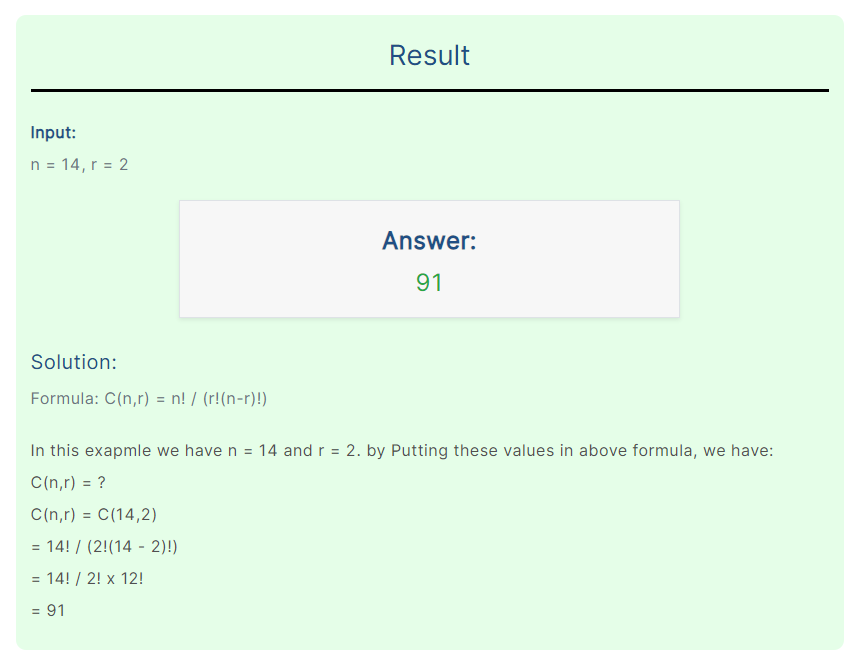

In [145]:
vector_incurridos_base <- c()
vector_incurridos_base_sub<- c()


# Datos iniciales son el vector resultados arriba


# Datos iniciales: Resultados_limpios

n_elementos_a_tomar <- 2
contador <- 0

# Generar todas las combinaciones posibles de 2 elementos
combinaciones <- combn(RESULTADOS_limpio, n_elementos_a_tomar)
combinaciones_1 <- combn(Resultados_limpio_inf, n_elementos_a_tomar)


validacion_regresio <- vector("list", length = ncol(combinaciones))
parametros <- vector("list", length = ncol(combinaciones))
comparativo <- vector("list", length = ncol(combinaciones))

comparativo_lasso<- vector("list", length = ncol(combinaciones))
parametros_LASSO <- vector("list", length = ncol(combinaciones))
validacion_LASSO <- vector("list", length = ncol(combinaciones))

parametros_RIDGE <- vector("list", length = ncol(combinaciones))
validacion_RIDGE <- vector("list", length = ncol(combinaciones))
comparativo_RIDGE<- vector("list", length = ncol(combinaciones))

if (ncol(combinaciones) != ncol(combinaciones_1)) {
  stop("Los vectores no tienen la misma longitud")
}

# Recorriendo ambos vectores al mismo tiempo
for (i in 1:ncol(combinaciones)) {
  # Obtener la combinación actual de 2 elementos
  elementos_test <- combinaciones[, i]
  elementos_test_1 <- combinaciones_1[, i]

  # Lógica de procesamiento
  contador <- contador + 1


  # Obtener los elementos que no están en la combinación (15 elementos)
  elementos_train <- setdiff(RESULTADOS_limpio, elementos_test)

  resultado_validacion <- intersect(Resultados_limpio_inf, elementos_test_1)

  elementos_comparativo <- setdiff(Resultados_limpio_inf, elementos_test_1)





# for que recorre cada una de las 15 aseguradoras que conforman el grupo de train

   for (m in 1:length(elementos_train))  {

      for (u in 1:length(elementos_comparativo)) {

   ####### REGRESIÓN ############

#Conocido
  log_incurridos_base <- log(elementos_train[[m]])
# desconocido

  incurridos_base_sub <- elementos_comparativo[[u]]


  # Ahora se saca el vector de incurridos conocidos por aseguradora
  #conocido
  incurridos_vector_base <- as.vector( log_incurridos_base)
  # desconocido
  incurridos_vector_base_sub <- as.vector(incurridos_base_sub )

  #incurridos_no_na_base <- incurridos_vector[!is.na(incurridos_vector_base)]
 # conocido
  vector_incurridos_base  <- c(vector_incurridos_base , incurridos_vector_base )
  #desconocido
  vector_incurridos_base_sub  <- c(vector_incurridos_base_sub , incurridos_vector_base_sub )

  }}


 # Se reemplzan los valores inf por 0 ( QUE SON LOS VALORES ORIGINALES)

# conocido
  Incurrido_limpio2 <- ifelse(is.infinite( vector_incurridos_base), 0, vector_incurridos_base)
# desconocido

 #Incurrido_limpio3 <- ifelse(is.infinite( vector_incurridos_base_sub), 0, vector_incurridos_base_sub)
# genero la matriz X compuesta para las 13 aseguradoras

  repeticiones <-  (length_2 )-2
  matriz_apilada <- do.call(rbind, replicate(repeticiones, matriz_ceros_df , simplify = FALSE))


#####################################################################

 # Concatenar para sacar los "y" de la matriz superior

   concatenado <- cbind( matriz_apilada , Incurrido_limpio2 )
   #Pasar a matriz
   concatenado_matriz  <- as.matrix(concatenado)
   MATRIZ_X_sin_na <- na.omit(concatenado_matriz)
   MATRIZ_X <- MATRIZ_X_sin_na [, -ncol(MATRIZ_X_sin_na )]
  Vector_incurridos_new <- MATRIZ_X_sin_na[, ncol(MATRIZ_X_sin_na )]



  # se hacen las transformaciones para encontrar los parámetros

  matriz_transpuesta <- t( MATRIZ_X )
  matriz1 <- as.matrix(matriz_transpuesta)
  matriz2 <- as.matrix( MATRIZ_X )
  multiplicacion_matricial <- matriz1 %*% matriz2
  matriz3 <- as.matrix( multiplicacion_matricial)
  matriz_inversa <- solve(matriz3)
  multiplicacion_matricial_2 <-matriz_inversa %*% matriz1
###########################################################################

   # Se calculan los párámetros

  parametros[[i]] <-exp(multiplicacion_matricial_2 %*%  Vector_incurridos_new)
  # saco los parámetros originales


  #### poner a prueba el modelo #########



# IBNR REAL PARA TRIANULO DE VALIDACION
  IBNR_guardado <- resultado_validacion[1]

  IBNR_guardado_vector <- unlist(IBNR_guardado)
  IBNR_guardado_vector <- na.omit(IBNR_guardado_vector)
 IBNR_guardado_vector_2 <- IBNR_guardado_vector[IBNR_guardado_vector != 0]

IBNR_guardado_vector_2 <- sum(IBNR_guardado_vector_2 )

  #### saco el IBNR calculado por regresion y usado con dato de validacion ####

validacion_regresio[[i]] <-  sum(matriz4  %*% parametros[[i]])

# criterio de evaluacióm #########
### HAGO CRITERIO RESPECTO A MI RESERVA TOTAL (n=1) ###
 comparativo[[i]] <- data.frame(
    Estimado = as.numeric(validacion_regresio[[i]]),
    Real = IBNR_guardado_vector_2,
    MAPE = abs(IBNR_guardado_vector_2 - as.numeric(validacion_regresio[[i]]))/IBNR_guardado_vector_2
  )

mape_lista <- lapply(comparativo, function(df) df$MAPE)

 ####### lASSO ############

#Paquete GLMNET Regression Lasso

#Sintaxis =glmnet(x,y...,alpha=1,nlambda=100..)
#alpha=0 entonces corre Regresion Ridge---->Contrae coeficientes pero no los hace cero
#alpha=1 entonces corre Regresion Lasso----> hace cero algunos coeficentes
#Este paquete estandariza las variables para que esten en la misma   escala

lasso.model = glmnet( MATRIZ_X  ,  Vector_incurridos_new, alpha=1)
dim(coef(lasso.model))

#Mejor lambda con validación cruzada
sal.cv=cv.glmnet( MATRIZ_X  ,  Vector_incurridos_new,alpha=1)
#plot(sal.cv)
mejor.lambda =sal.cv$lambda.min
mejor.lambda
log(mejor.lambda)

##hacer predicción conmejor lambda
coef(lasso.model)[,which(lasso.model$lambda==mejor.lambda)]
mejores_coeficientes <- coef(lasso.model)[,which(lasso.model$lambda==mejor.lambda)]
mejores_coeficientes_2 <- mejores_coeficientes[-1]
mejores_coeficiente_2 <- exp(mejores_coeficientes_2)
parametros_LASSO[[i]] <- as.matrix(mejores_coeficiente_2)



#### poner a prueba el modelo #########


#### saco el IBNR calculado por regresion y usado con dato de validacion ####

validacion_LASSO[[i]] <-  sum(matriz4  %*% parametros_LASSO[[i]])

# criterio de evaluacióm #########

### HAGO CRITERIO RESPECTO A MI RESERVA TOTAL (n=1) ###

 comparativo_lasso[[i]] <- data.frame(
    Estimado = as.numeric(validacion_LASSO[[i]]),
    Real = IBNR_guardado_vector_2,
    MAPE = abs(IBNR_guardado_vector_2 - as.numeric(validacion_LASSO[[i]]))/IBNR_guardado_vector_2
  )

mape_lasso <- lapply(comparativo_lasso, function(df) df$MAPE)

 ####### lASSO ############

 ####### RIDGE ############

ridge.model = glmnet (MATRIZ_X  ,  Vector_incurridos_new, alpha =0)
dim(coef(ridge.model))

#plot(ridge.model,"lambda",label=TRUE)
#Mejor lambda con validación cruzada
sal.cv=cv.glmnet(MATRIZ_X , Vector_incurridos_new,alpha=0)
#plot(sal.cv)
mejor.lambda =sal.cv$lambda.min
mejor.lambda
log(mejor.lambda)

##hacer prediccion conmejor lambda
coef(ridge.model)[,which(ridge.model$lambda==mejor.lambda)]
mejores_coeficientes <- coef(ridge.model)[, which(ridge.model$lambda == mejor.lambda)]
mejores_coeficientes_1 <- mejores_coeficientes[-1]
mejores_coeficiente_1 <- exp(mejores_coeficientes_1)
parametros_RIDGE[[i]] <- as.matrix(mejores_coeficiente_1 )


#### poner a prueba el modelo #########


#### saco el IBNR calculado por regresion y usado con dato de validacion ####


validacion_RIDGE[[i]] <-  sum(matriz4  %*% parametros_RIDGE[[i]])

# criterio de evaluacióm #########
### HAGO CRITERIO RESPECTO A MI RESERVA TOTAL (n=1) ###

 comparativo_RIDGE[[i]] <- data.frame(
    Estimado = as.numeric(validacion_LASSO[[i]]),
    Real = IBNR_guardado_vector_2,
    MAPE = abs(IBNR_guardado_vector_2 - as.numeric(validacion_RIDGE[[i]]))/IBNR_guardado_vector_2
  )

mape_RIDGE <- lapply(comparativo_RIDGE, function(df) df$MAPE)


 ####### RIDGE ############

################## parte de test##########################




 }

 Comparativo_validacion <- data.frame(Regresion = I(mape_lista), Lasso = I(mape_lasso), Ridge = I(mape_RIDGE))
  Comparativo_validacion$MenorColumna <- apply( Comparativo_validacion, 1, function(row) names(row)[which.min(row)])


Comparativo_validacion


Regresion,Lasso,Ridge,MenorColumna
<I<list>>,<I<list>>,<I<list>>,<chr>
0.968656....,0.999936....,0.999939....,Regresion
0.966409....,0.999938....,0.999941....,Regresion
0.965159....,0.999938....,0.999940....,Regresion
0.965873....,0.999938....,0.999941....,Regresion
0.965534....,0.999938....,0.999941....,Regresion
0.963652....,0.999940....,0.999942....,Regresion
0.963700....,0.999940....,0.999942....,Regresion
0.963866....,0.999940....,0.999942....,Regresion
0.962967....,0.999940....,0.999943....,Regresion


In [146]:
fila_min_resultados_1 <- Comparativo_validacion [which.min(as.numeric(Comparativo_validacion $Regresion)), ]
fila_min_resultados_1

,Regresion,Lasso,Ridge,MenorColumna
,<I<list>>,<I<list>>,<I<list>>,<chr>
37,0.041122....,0.998615....,0.998665....,Regresion


In [147]:
mape_vector <- unlist(mape_lista)
menor_valor <- min(mape_vector)
menor_valor

[1] 0.04112222

In [148]:
elementos_unicos <- length(unique( Comparativo_validacion$MenorColumna ))
elementos_unicos

[1] 2

Empieza la ultima validación la de test


In [149]:
 mape_lista_test <- c()
tipo_modelo <-c()
indicador <-c()



for (i in 1:nrow(Comparativo_validacion)) {
  palabra_actual <- Comparativo_validacion$MenorColumna[i]

  # Aplicar condicionales según el valor de la palabra_actual
  if (palabra_actual == "Regresion") {
    ###########

    # IBNR REAL PARA TRIANULO DE VALIDACION
  IBNR_guardado <- elemento_test_inf

  IBNR_guardado_vector <- unlist(IBNR_guardado)
  IBNR_guardado_vector <- na.omit(IBNR_guardado_vector)
 IBNR_guardado_vector_3 <- IBNR_guardado_vector[IBNR_guardado_vector != 0]

IBNR_guardado_vector_3 <- sum(IBNR_guardado_vector_3)

  #### saco el IBNR calculado por regresion y usado con dato de validacion ####

### HAGO CRITERIO RESPECTO A MI RESERVA TOTAL (n=1) ###
comparativo[[i]] <- data.frame(
     Estimado = as.numeric(validacion_regresio[[i]]),
     Real = IBNR_guardado_vector_3,
     MAPE = abs(IBNR_guardado_vector_3 - as.numeric(validacion_regresio[[i]]))/IBNR_guardado_vector_3
  )

 mape_lista_test <- lapply(comparativo, function(df) df$MAPE)

  tipo_modelo[i] <- "Regresion"

 #########


  }
  else if (palabra_actual == "Lasso") {



# criterio de evaluacióm #########

### HAGO CRITERIO RESPECTO A MI RESERVA TOTAL (n=1) ###

 comparativo_lasso[[i]] <- data.frame(
    Estimado = as.numeric(validacion_LASSO[[i]]),
    Real = IBNR_guardado_vector_3,
    MAPE = abs(IBNR_guardado_vector_3 - as.numeric(validacion_LASSO[[i]]))/IBNR_guardado_vector_3
  )

 mape_lista_test  <- lapply(comparativo_lasso, function(df) df$MAPE)



  tipo_modelo[i] <- "Lasso"

  ############################################
 } else if (palabra_actual == "ridge") {



#### saco el IBNR calculado por regresion y usado con dato de validacion ####


validacion_RIDGE[[i]] <-  sum(matriz4  %*% parametros_RIDGE[[i]])

# criterio de evaluacióm #########
### HAGO CRITERIO RESPECTO A MI RESERVA TOTAL (n=1) ###

 comparativo_RIDGE[[i]] <- data.frame(
    Estimado = as.numeric(validacion_LASSO[[i]]),
    Real = IBNR_guardado_vector_3,
    MAPE = abs(IBNR_guardado_vector_3 - as.numeric(validacion_RIDGE[[i]]))/IBNR_guardado_vector_3
  )


 mape_lista_test <- lapply(comparativo_RIDGE, function(df) df$MAPE)



    tipo_modelo[i] <- "ridge"
  }

    indicador[i] <-  i
}


  tabla_resultados <- data.frame(
    TipoModelo = tipo_modelo,
   Resultados = unlist( mape_lista_test),
     Indicador = indicador
)
tabla_resultados


TipoModelo,Resultados,Indicador
<chr>,<dbl>,<int>
Regresion,0.9999365,1
Regresion,0.9999386,2
Regresion,0.9999382,3
Regresion,0.9999385,4
Regresion,0.9999390,5
Regresion,0.9999406,6
Regresion,0.9999403,7
Regresion,0.9999401,8
Regresion,0.9999406,9


In [150]:
fila_min_resultados <- tabla_resultados[which.min(as.numeric(tabla_resultados$Resultados)), ]
fila_min_resultados

,TipoModelo,Resultados,Indicador
,<chr>,<dbl>,<int>
45,Regresion,0.9986074,45


In [ ]:
parametros[70]

In [167]:
Regression_91 <-  sum(matriz4  %*% parametros[[91]])
Regression_91

[1] 210793.1

In [152]:
Regression_70 <-  sum(matriz4  %*% parametros[[70]])
Regression_70

[1] 201606

In [153]:
Regression_45 <-  sum(matriz4  %*% parametros[[45]])
Regression_45

[1] 187105.3

In [154]:
install.packages('keras')
library(keras)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘RcppTOML’, ‘here’, ‘png’, ‘config’, ‘tfautograph’, ‘reticulate’, ‘tensorflow’, ‘tfruns’, ‘zeallot’




In [155]:
library(readr)
library(dplyr)
library(keras)
library(caret)

# Leer el archivo csv con los datos
datos <- read.csv("medmal_pos.csv")

# Eliminar las filas con valores faltantes
datos <- na.omit(datos)

# Crear la variable objetivo (IncurLoss_F2) y los atributos predictivos (AccidentYear y DevelopmentYear)
y <- datos$IncurLoss_F2
X <- datos[, c("AccidentYear", "DevelopmentYear")]

# Normalizar los datos
X <- scale(X)
y <- scale(y)

# Crear el modelo de red neuronal con Keras
model <- keras_model_sequential() %>%

  # Primera capa oculta con 64 unidades y función de activación relu
  layer_dense(units = 64, activation = "relu", input_shape = c(2)) %>%
  layer_dense(units = 32, activation = "relu") %>%
  layer_dense(units = 16, activation = "relu") %>%
  layer_dense(units = 8, activation = "relu") %>%
  layer_dense(units = 4, activation = "relu") %>%
  layer_dense(units = 1, activation = "linear")

# Compilar el modelo con el optimizador adam, la función de pérdida mean_squared_error y la métrica mean_squared_error
model %>% compile(
  optimizer = optimizer_adam(),
  loss = "mean_squared_error",
  metrics = c("mean_squared_error")
)

# Crear una función para calcular el Mean Squared Error (MSE)
mse <- function(y_true, y_pred) {
  mean((y_true - y_pred)^2)
}

# Dividir los datos en conjuntos de entrenamiento y prueba
set.seed(123)  # Establecer una semilla para reproducibilidad
index <- sample(1:nrow(datos), nrow(datos)*0.8)  # 80% para entrenamiento
train_data <- datos[index, ]
test_data <- datos[-index, ]

X_train <- scale(train_data[, c("AccidentYear", "DevelopmentYear")])
y_train <- scale(train_data$IncurLoss_F2)
X_test <- scale(test_data[, c("AccidentYear", "DevelopmentYear")])
y_test <- scale(test_data$IncurLoss_F2)

# Especificar el método de validación cruzada dejando uno fuera (LOOCV)
ctrl <- trainControl(method = "LOOCV")

# Configurar los callbacks con una menor frecuencia de actualización
callbacks <- list(
  callback_early_stopping(patience = 10),
  callback_model_checkpoint("model_checkpoint.h5", save_best_only = TRUE),
  callback_tensorboard("logs", update_freq = "epoch")  # Puedes ajustar la frecuencia aquí
)

# Ajustar el modelo con los datos de entrenamiento
fit <- model %>% fit(
  x = as.matrix(X_train),
  y = y_train,
  epochs = 50,
  batch_size = 20,
  verbose = 1,
  callbacks = callbacks,
  validation_data = list(as.matrix(X_test), y_test),
  trControl = ctrl
)

# Calcular el MSE para el modelo
nn_avg_mse <- mean((predict(model, as.matrix(X_test)) - y_test)^2, na.rm = TRUE)

# Imprimir el resultado
cat("Neural Network LOOCV-MSE:", nn_avg_mse, "\n")

Neural Network LOOCV-MSE: 0.9912324 


In [156]:
# Ajustar un modelo de regresión lineal
modelo_regresion <- lm(IncurLoss_F2 ~ AccidentYear + DevelopmentYear, data = datos)

# Obtener los coeficientes y términos independientes del modelo
coeficientes <- coef(modelo_regresion)
cat("Coeficientes:\n", coeficientes, "\n")


Coeficientes:
 -1295156 1165.765 -508.7741 


In [157]:
vector_coeficientes <- c(coeficientes["(Intercept)"], coeficientes["AccidentYear"], coeficientes["DevelopmentYear"])

In [158]:
Promutual4  <- Promutual [, c("Año_Accidente", "Año_desarrollo", "Incurridos_año")]
Promutual4

,Año_Accidente,Año_desarrollo,Incurridos_año
,<dbl>,<dbl>,<dbl>
101,1988,1988,43393
102,1988,1989,39560
103,1988,1990,50398
104,1988,1991,46630
105,1988,1992,44007
106,1988,1993,30000
107,1988,1994,27171
108,1988,1995,27395
109,1988,1996,27034


In [159]:
Promutual4$Incurridos_año <- ifelse(Promutual4$Año_desarrollo < 1998, "0", Promutual4$Incurridos_año )
Promutual4$Incurridos_año <- as.numeric(Promutual4$Incurridos_año)

In [160]:
Promutual4

,Año_Accidente,Año_desarrollo,Incurridos_año
,<dbl>,<dbl>,<dbl>
101,1988,1988,0
102,1988,1989,0
103,1988,1990,0
104,1988,1991,0
105,1988,1992,0
106,1988,1993,0
107,1988,1994,0
108,1988,1995,0
109,1988,1996,0


In [161]:
Promutual5 <- Promutual4 [, c("Año_Accidente", "Año_desarrollo")]

Promutual5

,Año_Accidente,Año_desarrollo
,<dbl>,<dbl>
101,1988,1988
102,1988,1989
103,1988,1990
104,1988,1991
105,1988,1992
106,1988,1993
107,1988,1994
108,1988,1995
109,1988,1996


In [162]:
Promutual5 <- as.matrix(Promutual4[, c("Año_Accidente", "Año_desarrollo")])


In [163]:
matriz_con_unos <- cbind(1, Promutual5 )

In [164]:
matriz_con_unos

,,Año_Accidente,Año_desarrollo
101,1,1988,1988
102,1,1988,1989
103,1,1988,1990
104,1,1988,1991
105,1,1988,1992
106,1,1988,1993
107,1,1988,1994
108,1,1988,1995
109,1,1988,1996
110,1,1988,1997


In [165]:
resultado1 <-  matriz_con_unos %*% vector_coeficientes
resultado1 <- sum(resultado1)
resultado1

[1] 1160934

In [166]:
comparativo_IBNR <- data.frame(Red_Neuronal = 1160934.44117625, Real =  1377449,Diferencia = (  1377449- 2063966.20693671)/ 1160934.44117625)
comparativo_IBNR

Red_Neuronal,Real,Diferencia
<dbl>,<dbl>,<dbl>
1160934,1377449,-0.5913488
